## MIIA-4203 MODELOS AVANZADOS PARA ANÁLISIS DE DATOS II
# Micro-Proyecto 1

### Profesor: Camilo Franco (c.franco31@uniandes.edu.co)

A continuación escriba los nombres de los integrantes del grupo.

Nombres:

**Integrante 1: Angie Paola Chacón  	Código: 201012536** 

**Integrante 2: Carolina Padilla Hernández	Código: 201111402**

**Integrante 3: Juan Sebastián Rincón	Código: 201214767**


### Introducción
Una *start-up* agrícola quiere construir una aplicación online que conecte el campo
con la ciudad de manera directa y sin intermediarios. De esta manera, los agricultores ponen a la disposición de la empresa sus distintos productos, y la start-up se encarga de atender las necesidades de demanda distribuyendo los productos hasta los clientes finales en la ciudad.

Para optimizar la gestión logística y desarrollar esta labor de manera eficiente, los dueños de la *start-up* han visto la necesidad de diseñar e implementar un sistema de gestión y predicción que les permita planear con la debida anticipación la demanda esperada. Así podrán coordinar las actividades de producción, junto con los agricultores, y atender la demanda mientras se minimizan las pérdidas por unidades de producto no vendido o estropeado. 

Este es un reto altamente relevante para la sostenibilidad de la industria alimentaria, donde gran cantidad de las pérdidas se refieren a grupos alimenticios donde la frescura del producto es un importante criterio para el consumo. El desperdicio de los alimentos se relaciona con el sobre-pedido o el sobre-almacenamiento, lo cual puede a su vez ser consecuencia de dificultades en el pronóstico de la demanda. Este problema es aun más marcado a medida que uno sube en la cadena de producción y se aleja de los patrones de comportamiento del consumidor final. 

Por lo tanto, la start-up agrícola debe gestionar los inventarios de manera inteligente, disminuyendo la ventana de tiempo entre cosecha y consumo. Para ello, necesita desarrollar modelos de predicción de demanda que apoyen su operación, logrando la disponibilidad de los productos para atender a los clientes del día siguiente, minimizando los desperdicios de alimentos e identificando hábitos de consumo que le permita optimizar sus operaciones logísticas y de negocio.

### Enunciado
Por ello se le pide a usted, en calidad de consultor externo, desarrollar un modelo predictivo de demanda para los productos más relevantes con los que trabaja la start-up agrícola, obteniendo una predicción a nivel semanal (una semana adelante). Los datos los encuentra en el archivo DatosAgro.txt, donde se tiene la identificación del cliente, la fecha en que realizó el pedido, la magnitud del pedido (en unidades según lo especificado en el nombre del producto), su precio, y el código del producto agrícola que consta en el pedido.

## 1. Visualicemos los datos

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.listdir('/content/drive/My Drive/Colab Notebooks/')

['device_db.csv',
 'Ang TreePractice.ipynb',
 'Copy of datapreparation_practice2.ipynb',
 'boxplot.pdf',
 'boxplots.pdf',
 'Ang of Taller1.ipynb',
 'Angie Clase 3: TreePractice.ipynb',
 'diabetes.csv',
 'diabetes.png',
 'diabetes2.png',
 'Refuerzo',
 'Copy of Taller1.ipynb',
 'DatosAgro.txt',
 'Angie DT_Scikit-learn_Practice.ipynb',
 'BaseAgroDiaria.xlsx',
 'MatrizDff.xlsx',
 'Copia de Tensor de MicroProyecto1_StartUpF (2).ipynb',
 'Copia de Tensor de MicroProyecto1_StartUpF (1).ipynb',
 'Copia de Tensor de MicroProyecto1_StartUpF.ipynb',
 'BASEF.xlsx']

In [ ]:
# Importemos los datos y visualizemos la serie de tiempo
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/DatosAgro.txt", delimiter='\t', encoding="utf8")
data = data.drop('Unnamed: 6', 1)
data["ventas"] = data.Pedido * data.Precio
data.head()

,Cliente,Fecha,Pedido,Precio,Producto,Nombre_producto,ventas
0,Cliente26,18/09/2017,20,700,VER0049,Yerbabuena / 100 gramos,14000
1,Cliente26,18/09/2017,10,1200,FRU0024,Limón Tahití / Libra,12000
2,Cliente26,18/09/2017,4,1600,VER0041,Puerro / Libra,6400
3,Cliente26,18/09/2017,10,1500,VER0038,Pimentón Rojo / Libra,15000
4,Cliente26,18/09/2017,8,1100,VER0010,Zucchini Verde / Libra,8800


In [ ]:
#Cambiar la variable fecha a formato date time
data.dtypes
data["Fecha"] = pd.to_datetime(data["Fecha"])

In [ ]:
print("min",min(data["Fecha"]))
print("max",max(data["Fecha"]))

min 2016-01-12 00:00:00
max 2017-12-09 00:00:00


Veamos los clientes con mayor participación en la demanda:

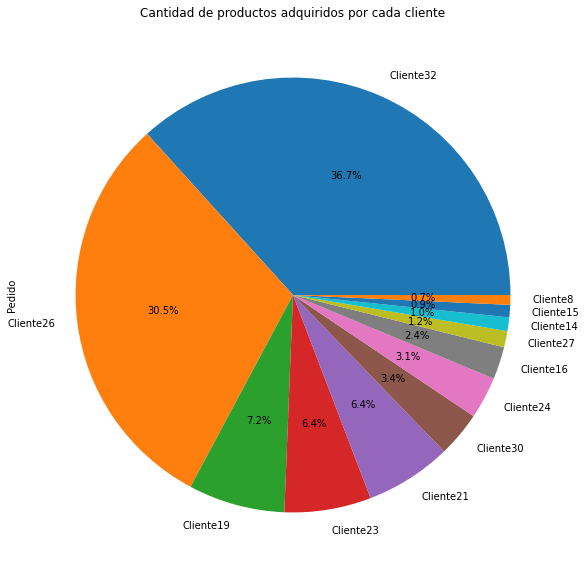

In [ ]:
cliente = pd.DataFrame(data[data['Pedido'] > 10].groupby(data["Cliente"]).sum())
cliente2 = cliente[cliente['Pedido']>50]
cliente3 = cliente2.sort_values("Pedido", ascending= False)
cliente3.plot.pie(y='Pedido', figsize=(10, 10), legend=False, autopct='%1.1f%%')
plt.title("Cantidad de productos adquiridos por cada cliente")
plt.show()


In [ ]:
pd.unique(data["Cliente"]).shape # Total clientes 34

(34,)

Veamos los productos con más volumen de pedido:

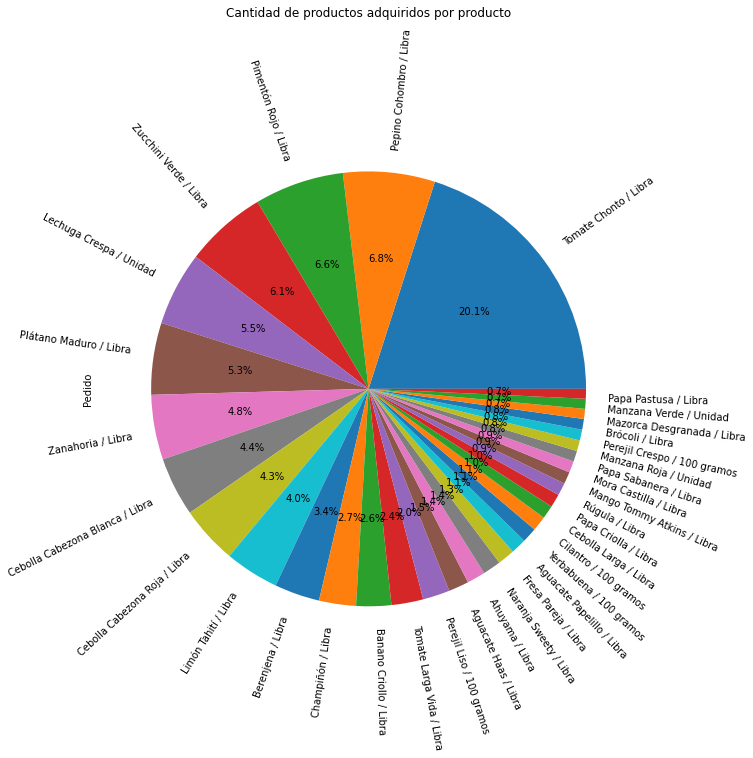

In [ ]:
productos = pd.DataFrame(data["Pedido"].groupby(data["Nombre_producto"]).sum())
productos2 = productos[productos['Pedido']>140]
productos3 = productos2.sort_values("Pedido", ascending= False)
productos3.plot.pie(y='Pedido', figsize=(10, 10), legend=False, autopct='%1.1f%%', rotatelabels=True)
plt.title("Cantidad de productos adquiridos por producto", pad=100)
plt.show()

A continuación implemente la metodología propuesta para construir su modelo:

In [ ]:
#Imprimir la fecha mínima y máxima
print("min",min(data["Fecha"]))
print("max",max(data["Fecha"]))
#df[["Fecha","Pedido"]].plot(figsize=(20,10), linewidth=5, fontsize=20)
#plt.xlabel('Year', fontsize=20)
#df = data[data['Cliente'] == "Cliente32"]


min 2016-01-12 00:00:00
max 2017-12-09 00:00:00


### Pareto de clientes que más demandan pedidos

In [ ]:
cliente4 = pd.DataFrame(data.groupby(data["Cliente"]).sum())
cliente4.head()

,Pedido,Precio,ventas
Cliente,,,
Cliente1,73,87230,129430
Cliente10,466,488290,953630
Cliente11,168,70600,309000
Cliente12,86,139480,216240
Cliente13,462,248650,631100


In [ ]:
cliente4.reset_index(level=0, inplace=True)

In [ ]:
cliente5= cliente4
cliente5.dtypes

Cliente    object
Pedido      int64
Precio      int64
ventas      int64
dtype: object

In [ ]:
cliente5= cliente5.sort_values(by="ventas", ascending=False)
cliente5["porcentaje_ventas"]=cliente5["ventas"].cumsum()/cliente5["ventas"].sum()*100
cliente5.head()

,Cliente,Pedido,Precio,ventas,porcentaje_ventas
25,Cliente32,6680,1501380,9762040,25.415480
21,Cliente29,3188,2383350,7536400,45.036504
13,Cliente21,2485,1087100,3949300,55.318510
18,Cliente26,2935,199450,3684050,64.909937
22,Cliente3,1105,773300,2011950,70.148051


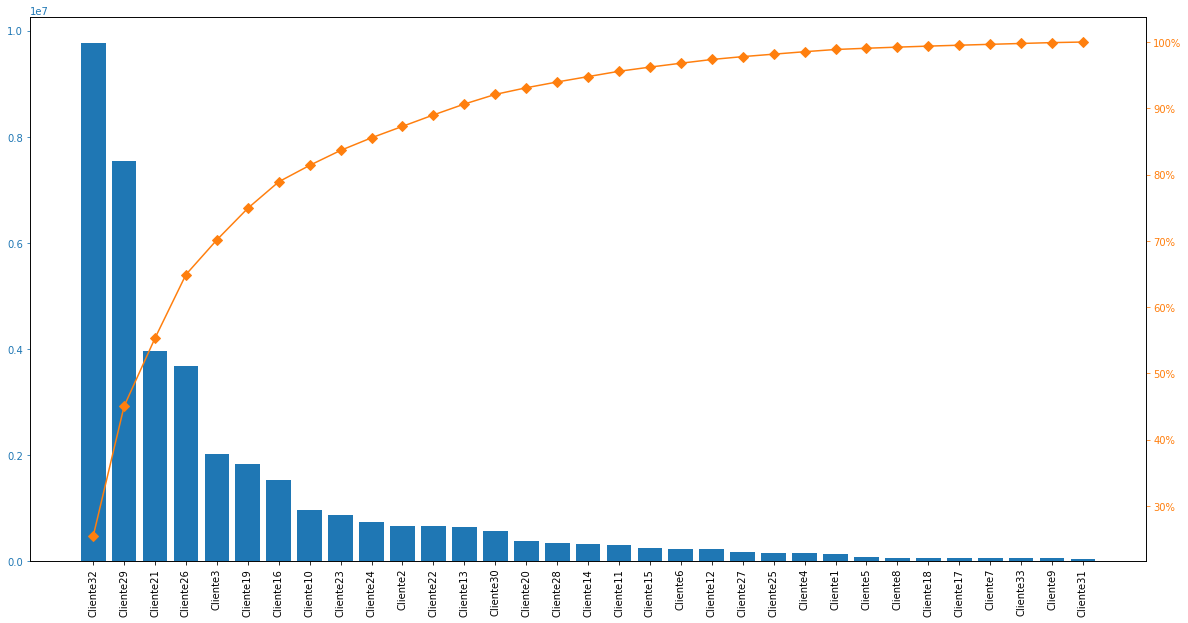

In [ ]:
from matplotlib.ticker import PercentFormatter

fig, ax = plt.subplots(figsize=(20,10))
ax.bar(cliente5["Cliente"], cliente5["ventas"], color="C0")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax2 = ax.twinx()
ax2.plot(cliente5["Cliente"], cliente5["porcentaje_ventas"], color="C1", marker="D", ms=7 )
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.show()


In [ ]:
cliente_fin= cliente5[cliente5["porcentaje_ventas"] < 80]
cliente_fin

,Cliente,Pedido,Precio,ventas,porcentaje_ventas
25,Cliente32,6680,1501380,9762040,25.415480
21,Cliente29,3188,2383350,7536400,45.036504
13,Cliente21,2485,1087100,3949300,55.318510
18,Cliente26,2935,199450,3684050,64.909937
22,Cliente3,1105,773300,2011950,70.148051
10,Cliente19,1277,289550,1830250,74.913108
7,Cliente16,619,476730,1534270,78.907581


In [ ]:
labels = cliente_fin['Cliente']
clie = pd.DataFrame(cliente_fin.groupby(cliente_fin["Cliente"]).agg("ventas").sum().sort_values(ascending=False))
clie

,ventas
Cliente,
Cliente32,9762040
Cliente29,7536400
Cliente21,3949300
Cliente26,3684050
Cliente3,2011950
Cliente19,1830250
Cliente16,1534270


Text(0.5, 1.0, 'Clientes con más ventas')

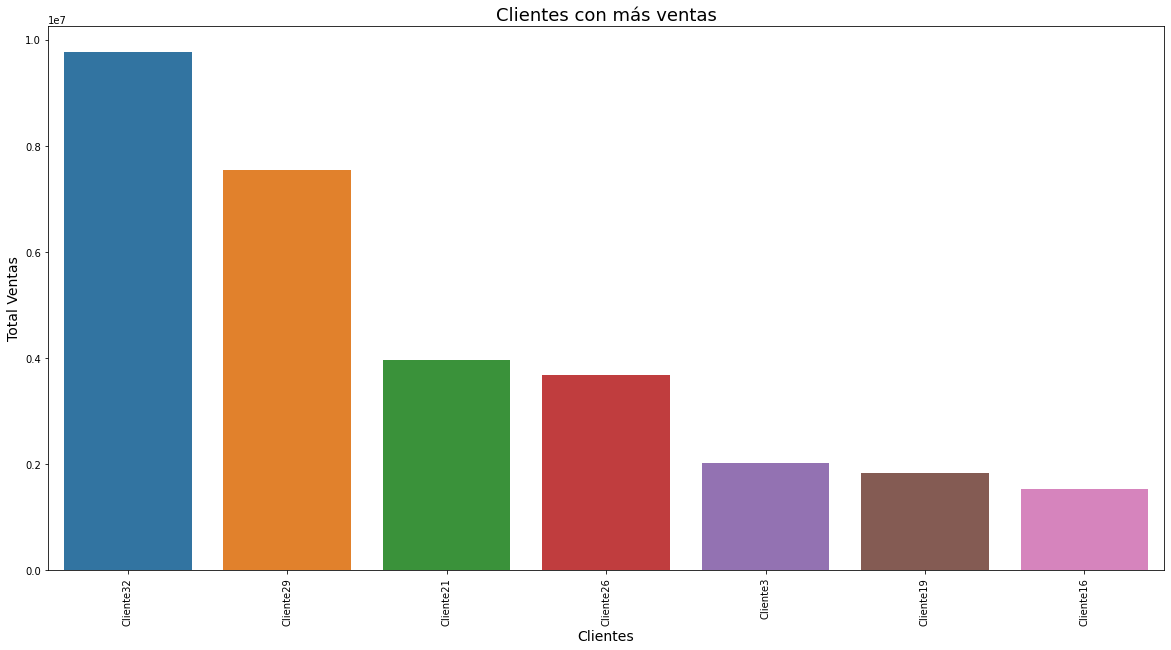

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x=clie.index, y="ventas", data=clie, ci=None)
plt.ylabel("Total Ventas", size=14)
plt.xlabel("Clientes", size=14)
plt.xticks(rotation=90)
plt.title("Clientes con más ventas", size=18)
#plt.savefig("barplot_Seaborn_barplot_Python.png")


In [ ]:
lista_fin =["Cliente32", "Cliente29", "Cliente21", "Cliente26", "Cliente19", "Cliente3", "Cliente16"]
dff= data[data["Cliente"].isin(lista_fin)]
dff.head()

,Cliente,Fecha,Pedido,Precio,Producto,Nombre_producto,ventas
0,Cliente26,2017-09-18,20,700,VER0049,Yerbabuena / 100 gramos,14000
1,Cliente26,2017-09-18,10,1200,FRU0024,Limón Tahití / Libra,12000
2,Cliente26,2017-09-18,4,1600,VER0041,Puerro / Libra,6400
3,Cliente26,2017-09-18,10,1500,VER0038,Pimentón Rojo / Libra,15000
4,Cliente26,2017-09-18,8,1100,VER0010,Zucchini Verde / Libra,8800


### **Pareto de productos que más ventas generan a la startUp** 

In [ ]:
cliente6 = pd.DataFrame(data.groupby(data["Nombre_producto"]).sum())
cliente6.head()

,Pedido,Precio,ventas
Nombre_producto,,,
Acelga / Libra,26,6280,18140
Agraz / Libra,22,93100,175600
Aguacate Haas / Libra,300,68000,600000
Aguacate Papelillo / Libra,229,180300,579900
Ahuyama / Libra,271,29700,176300


In [ ]:
cliente6.reset_index(level=0, inplace=True)
cliente7 = cliente6

In [ ]:
cliente7.head()

,Nombre_producto,Pedido,Precio,ventas
0,Acelga / Libra,26,6280,18140
1,Agraz / Libra,22,93100,175600
2,Aguacate Haas / Libra,300,68000,600000
3,Aguacate Papelillo / Libra,229,180300,579900
4,Ahuyama / Libra,271,29700,176300


In [ ]:
cliente7= cliente7.sort_values(by="ventas", ascending=False)
cliente7["porcentaje_ventas_produc"]=cliente7["ventas"].cumsum()/cliente7["ventas"].sum()*100
product_fin= cliente7[cliente7["porcentaje_ventas_produc"] < 80]
product_fin

,Nombre_producto,Pedido,Precio,ventas,porcentaje_ventas_produc
105,Tomate Chonto / Libra,4000,531550,5981700,15.534333
28,Champiñón / Libra,547,1505800,4029800,25.999628
90,Pimentón Rojo / Libra,1324,266750,2203150,31.721156
54,Lechuga Crespa / Unidad,1094,271300,1718400,36.183800
120,Zucchini Verde / Libra,1211,218500,1628100,40.411938
25,Cebolla Cabezona Roja / Libra,858,217800,1352800,43.925127
84,Pepino Cohombro / Libra,1360,207550,1311030,47.329841
24,Cebolla Cabezona Blanca / Libra,874,125540,1202220,50.451978
95,Plátano Maduro / Libra,1064,64200,1132900,53.394092
116,Zanahoria / Libra,961,114850,1125600,56.317249


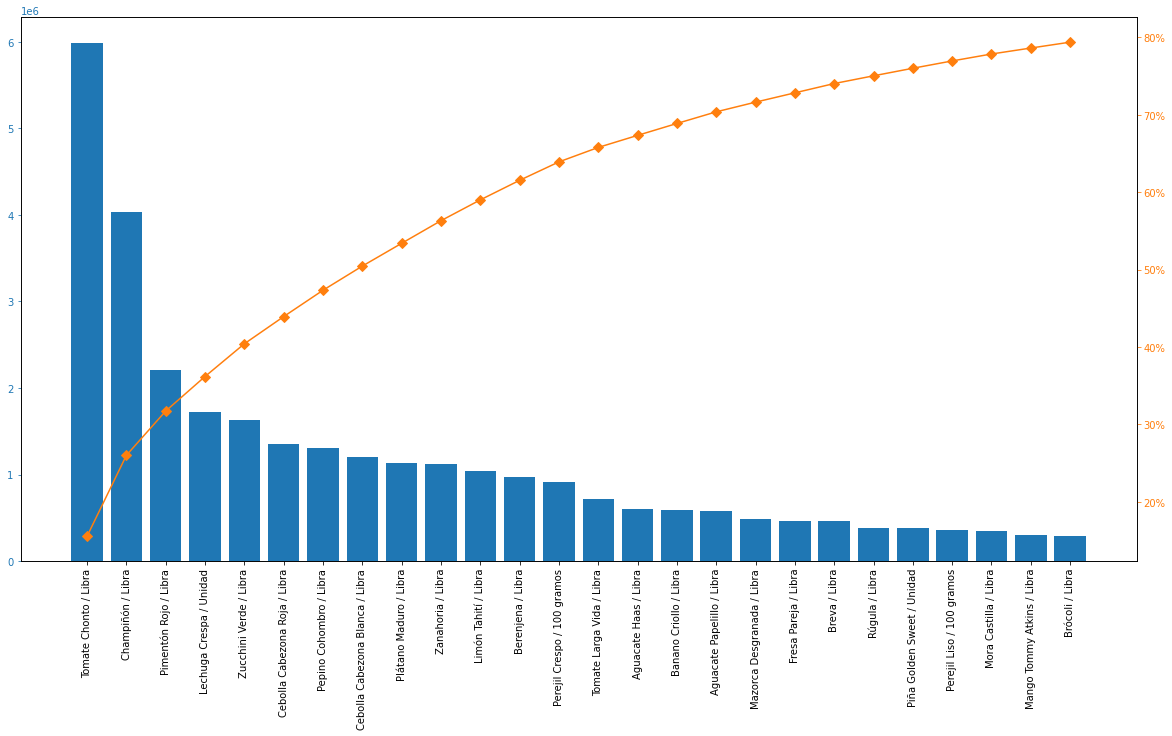

In [ ]:
from matplotlib.ticker import PercentFormatter
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(product_fin["Nombre_producto"], product_fin["ventas"], color="C0")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax2 = ax.twinx()
ax2.plot(product_fin["Nombre_producto"], product_fin["porcentaje_ventas_produc"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

In [ ]:
pro = pd.DataFrame(cliente7.groupby(cliente7["Nombre_producto"]).agg("ventas").sum().sort_values(ascending=False))
pro

,ventas
Nombre_producto,
Tomate Chonto / Libra,5981700
Champiñón / Libra,4029800
Pimentón Rojo / Libra,2203150
Lechuga Crespa / Unidad,1718400
Zucchini Verde / Libra,1628100
...,...
Pera Nacional / Libra,3000
Toronjil,2500
Manzana Nacional / Libra,2000


In [ ]:
pro=pro.nlargest(15, 'ventas')
pro

,ventas
Nombre_producto,
Tomate Chonto / Libra,5981700
Champiñón / Libra,4029800
Pimentón Rojo / Libra,2203150
Lechuga Crespa / Unidad,1718400
Zucchini Verde / Libra,1628100
Cebolla Cabezona Roja / Libra,1352800
Pepino Cohombro / Libra,1311030
Cebolla Cabezona Blanca / Libra,1202220
Plátano Maduro / Libra,1132900


Text(0.5, 1.0, 'Top 15 productos con más ventas')

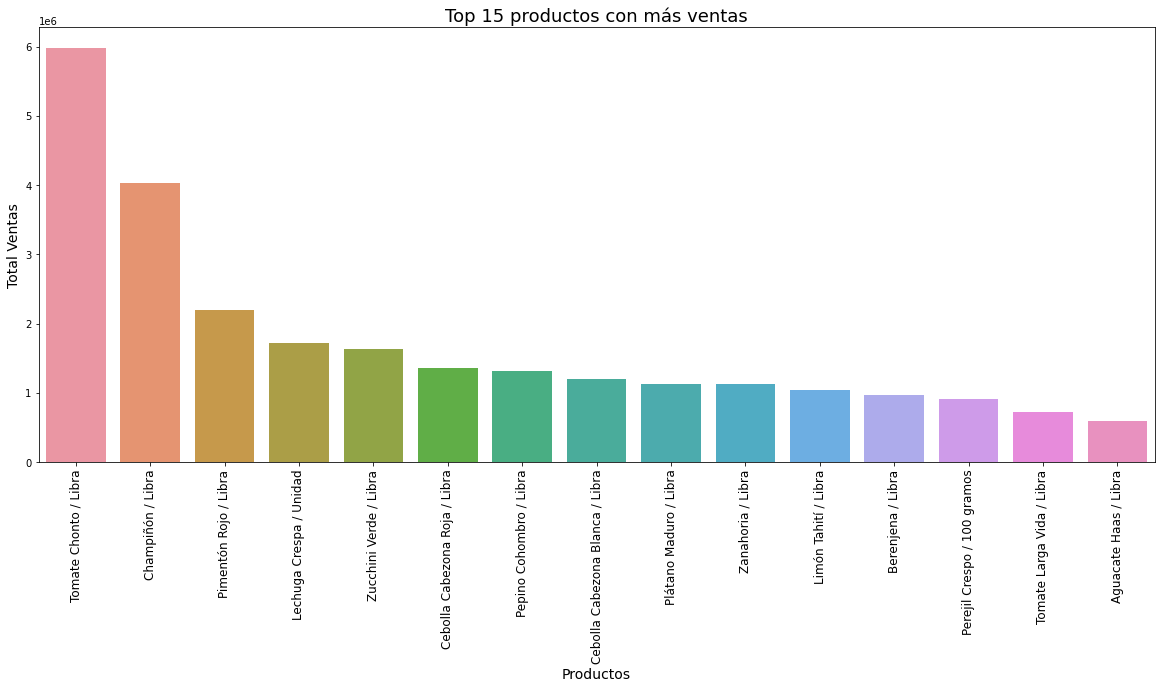

In [ ]:
plt.figure(figsize=(20, 8))
sns.barplot(x=pro.index, y="ventas", data=pro, ci=None)
plt.ylabel("Total Ventas", size=14)
plt.xlabel("Productos", size=14)
plt.xticks(rotation=90, size=12)
plt.title("Top 15 productos con más ventas", size=18)
#plt.savefig("barplot_Seaborn_barplot_Python.png")

In [ ]:
product_fin.shape

(26, 5)

### **Modelos para prónostico hacia adelante**


In [ ]:
lista_fin2 = pd.unique(product_fin["Nombre_producto"])
lista_fin2

array(['Tomate Chonto / Libra', 'Champiñón / Libra',
       'Pimentón Rojo / Libra', 'Lechuga Crespa / Unidad',
       'Zucchini Verde / Libra', 'Cebolla Cabezona Roja / Libra',
       'Pepino Cohombro / Libra', 'Cebolla Cabezona Blanca / Libra',
       'Plátano Maduro / Libra', 'Zanahoria / Libra',
       'Limón Tahití / Libra', 'Berenjena / Libra',
       'Perejil Crespo / 100 gramos', 'Tomate Larga Vida / Libra',
       'Aguacate Haas / Libra', 'Banano Criollo / Libra',
       'Aguacate Papelillo / Libra', 'Mazorca Desgranada / Libra',
       'Fresa Pareja / Libra', 'Breva / Libra', 'Rúgula / Libra',
       'Piña Golden Sweet / Unidad', 'Perejil Liso / 100 gramos',
       'Mora Castilla / Libra', 'Mango Tommy Atkins / Libra',
       'Brócoli / Libra'], dtype=object)

Base con los 26 productos con más ventas

In [ ]:
dff2= data[data["Nombre_producto"].isin(lista_fin2)]
dff2.head()

,Cliente,Fecha,Pedido,Precio,Producto,Nombre_producto,ventas
1,Cliente26,2017-09-18,10,1200,FRU0024,Limón Tahití / Libra,12000
3,Cliente26,2017-09-18,10,1500,VER0038,Pimentón Rojo / Libra,15000
4,Cliente26,2017-09-18,8,1100,VER0010,Zucchini Verde / Libra,8800
5,Cliente26,2017-09-18,30,1000,VER0052,Plátano Maduro / Libra,30000
6,Cliente26,2017-09-18,24,1000,TUB0012,Zanahoria / Libra,24000


In [ ]:
dff2["Cliente"].unique().shape #Quedan 34 clientes 

(34,)

In [ ]:
dff2["Nombre_producto"].unique().shape #Quedan 26 productos 

(26,)

In [ ]:
#Imprimir la fecha mínima y máxima
print("min",min(dff2["Fecha"]))
print("max",max(dff2["Fecha"]))

min 2016-01-12 00:00:00
max 2017-12-09 00:00:00


In [ ]:
df=dff2[['Fecha','Nombre_producto', 'Pedido']]
df.head()

,Fecha,Nombre_producto,Pedido
1,2017-09-18,Limón Tahití / Libra,10
3,2017-09-18,Pimentón Rojo / Libra,10
4,2017-09-18,Zucchini Verde / Libra,8
5,2017-09-18,Plátano Maduro / Libra,30
6,2017-09-18,Zanahoria / Libra,24


### **Creación Base de datos consolidado por la demanda semanal de cada producto**

In [ ]:
df.shape

(2896, 3)

In [ ]:
df['Fecha'] = df['Fecha'] - pd.to_timedelta(7, unit='d')
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Fecha,Nombre_producto,Pedido
1,2017-09-11,Limón Tahití / Libra,10
3,2017-09-11,Pimentón Rojo / Libra,10
4,2017-09-11,Zucchini Verde / Libra,8
5,2017-09-11,Plátano Maduro / Libra,30
6,2017-09-11,Zanahoria / Libra,24


In [ ]:
#Se agruparon los datos en semanas

df = df.groupby(['Nombre_producto', pd.Grouper(key='Fecha', freq='W-MON')])['Pedido'].sum().reset_index().sort_values('Fecha')
df.head()

,Nombre_producto,Fecha,Pedido
145,Brócoli / Libra,2016-01-11,1
180,Cebolla Cabezona Blanca / Libra,2016-01-11,3
94,Berenjena / Libra,2016-01-11,2
569,Pepino Cohombro / Libra,2016-01-11,1
939,Zanahoria / Libra,2016-01-11,2


Se observa que en la base solamente hay información de 59 semanas a pesar de que entre la fecha de inicio (enero de 2016) y la fecha fin (diciembre 2017) hay 100 semanas. Por lo tanto, la serie de tiempo por semana no está completa. 

In [ ]:
df["Fecha"].nunique()

59

In [ ]:
df.index = pd.to_datetime(df.Fecha)
df.head()

,Nombre_producto,Fecha,Pedido
Fecha,,,
2016-01-11,Brócoli / Libra,2016-01-11,1
2016-01-11,Cebolla Cabezona Blanca / Libra,2016-01-11,3
2016-01-11,Berenjena / Libra,2016-01-11,2
2016-01-11,Pepino Cohombro / Libra,2016-01-11,1
2016-01-11,Zanahoria / Libra,2016-01-11,2


In [ ]:
del df['Fecha']

In [ ]:
df.shape

(1033, 2)

In [ ]:
print(df.index.min())
print(df.index.max())

2016-01-11 00:00:00
2017-12-04 00:00:00


In [ ]:
df1=  pd.DataFrame(df["Pedido"].groupby([df["Nombre_producto"], df.index]).sum())
df1

Pedido
Nombre_producto        Fecha             
Aguacate Haas / Libra  2016-05-09      11
                       2016-11-14     118
                       2016-11-21       5
                       2016-12-12       2
                       2017-01-02       3
...                                   ...
Zucchini Verde / Libra 2017-09-25      28
                       2017-10-02      22
                       2017-11-06      16
                       2017-11-27      32
                       2017-12-04      14

[1033 rows x 1 columns]

In [ ]:
df1.shape

(1033, 1)

In [ ]:
df.describe()

,Pedido
count,1033.000000
mean,17.575992
std,25.064651
min,1.000000
25%,3.000000
50%,8.000000
75%,21.000000
max,206.000000


### **Anpalisis y limpieza de base de datos**



In [ ]:
pru=df[df["Nombre_producto"]=="Champiñón / Libra"]
pru.head()

,Nombre_producto,Pedido
Fecha,,
2016-01-11,Champiñón / Libra,1
2016-02-08,Champiñón / Libra,3
2016-04-11,Champiñón / Libra,1
2016-06-06,Champiñón / Libra,1
2016-08-08,Champiñón / Libra,1


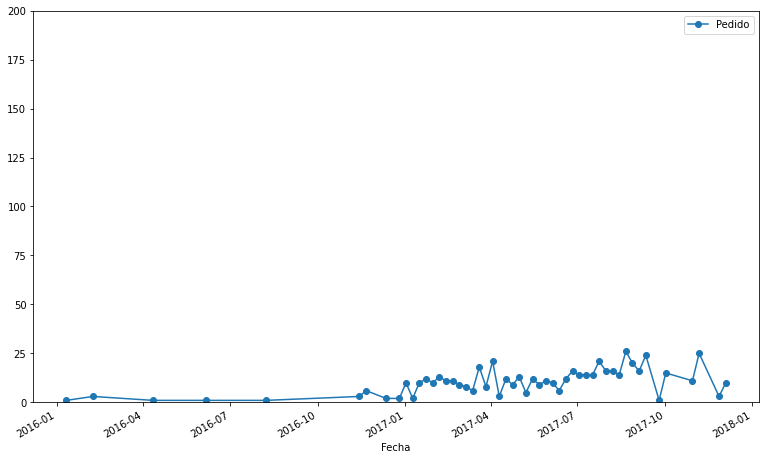

In [ ]:
pru[pru["Nombre_producto"]== "Champiñón / Libra"].plot(ylim=(0,200), figsize=(13,8) , marker='o')

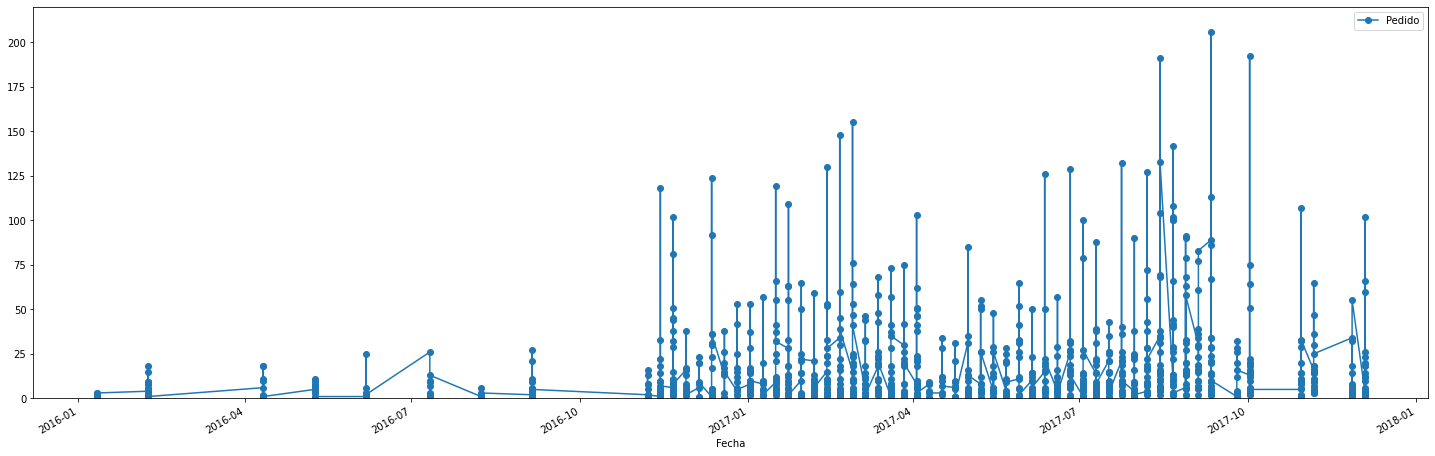

In [ ]:
df_consolidado2 = pd.DataFrame(df["Pedido"])
df_consolidado2.plot(ylim=(0,220), figsize=(25,8) , marker='o')

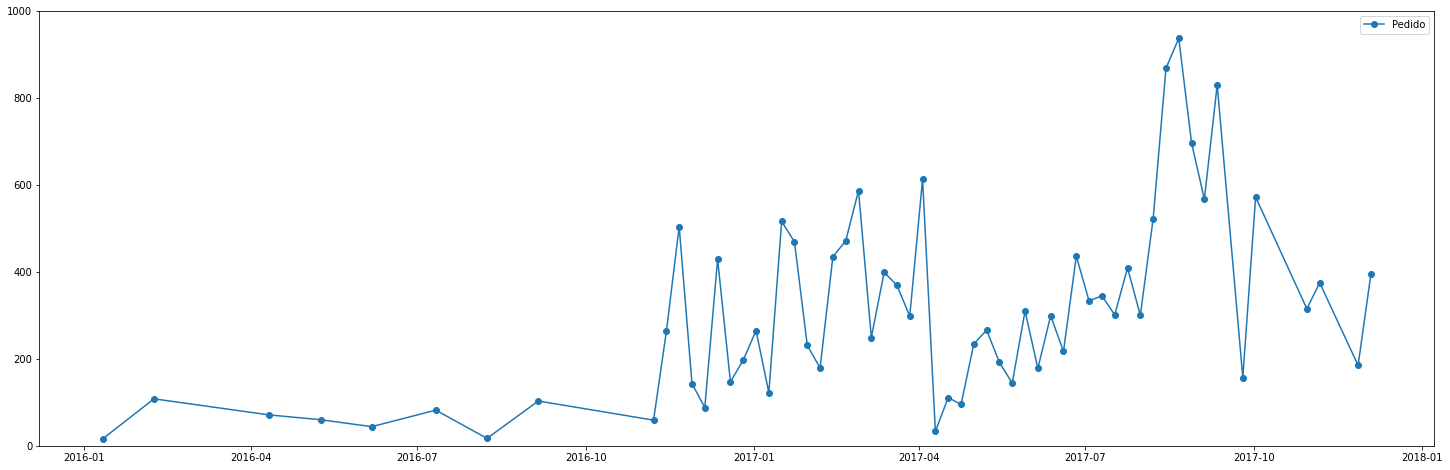

In [ ]:
df_consolidado1 = pd.DataFrame(df["Pedido"].groupby([df.index.date]).sum())
df_consolidado1.plot(ylim=(0,1000), figsize=(25,8) , marker='o')

Se elimina la información de enero a noviembre de 2016 y de octubre a diciembre de 2017, dado que hay muchos missing values.   

In [ ]:
dff = df.loc["12-01-2016" : "10-01-2017"]

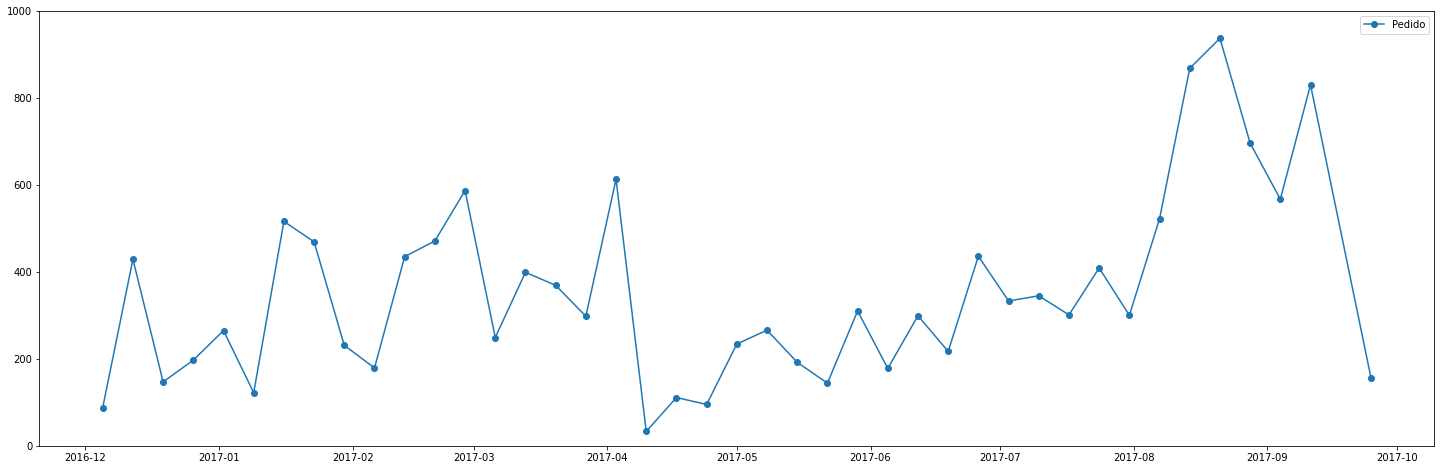

In [ ]:
df_consolidado = pd.DataFrame(dff["Pedido"].groupby([dff.index.date]).sum())
df_consolidado.plot(ylim=(0,1000), figsize=(25,8) , marker='o')

In [ ]:
#Se exportan los datos: OJO NO BORRAR
#from google.colab import files
#dff.to_csv('newdff.csv', index_label='ID')
#files.download('newdff.csv')

In [ ]:
dff = pd.read_excel("/content/drive/My Drive/Colab Notebooks/BASEF.xlsx")
dff.tail()

,Fecha,Aguacate Haas / Libra,Aguacate Papelillo / Libra,Banano Criollo / Libra,Berenjena / Libra,Brócoli / Libra,Breva / Libra,Cebolla Cabezona Blanca / Libra,Cebolla Cabezona Roja / Libra,Champiñón / Libra,Fresa Pareja / Libra,Lechuga Crespa / Unidad,Limón Tahití/ Libra,Mango Tommy Atkins / Libra,Mazorca Desgranada / Libra,Mora Castilla / Libra,Pepino Cohombro / Libra,Perejil Crespo / 100 gramos,Perejil Liso / 100 gramos,Piña Golden Sweet / Unidad,Pimentón Rojo / Libra,Plátano Maduro / Libra,Rúgula / Libra,Tomate Chonto / Libra,Tomate Larga Vida / Libra,Zanahoria / Libra,Zucchini Verde / Libra
48,2017-11-06,14,5,16,5,4,0,0,36,25,14,11,18,9,3,7,4,0,3,5,30,47,11,65,9,18,16
49,2017-11-13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50,2017-11-20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
51,2017-11-27,0,0,0,14,0,0,0,4,3,1,8,5,0,0,2,18,2,7,0,34,0,0,55,0,0,32
52,2017-12-04,0,3,6,3,2,0,60,20,10,3,18,2,2,12,2,26,0,0,1,23,66,4,102,4,12,14


In [ ]:
dff.shape

(53, 27)

In [ ]:
dff.index = pd.to_datetime(dff.Fecha)
del dff["Fecha"]
dff.head()

,Aguacate Haas / Libra,Aguacate Papelillo / Libra,Banano Criollo / Libra,Berenjena / Libra,Brócoli / Libra,Breva / Libra,Cebolla Cabezona Blanca / Libra,Cebolla Cabezona Roja / Libra,Champiñón / Libra,Fresa Pareja / Libra,Lechuga Crespa / Unidad,Limón Tahití/ Libra,Mango Tommy Atkins / Libra,Mazorca Desgranada / Libra,Mora Castilla / Libra,Pepino Cohombro / Libra,Perejil Crespo / 100 gramos,Perejil Liso / 100 gramos,Piña Golden Sweet / Unidad,Pimentón Rojo / Libra,Plátano Maduro / Libra,Rúgula / Libra,Tomate Chonto / Libra,Tomate Larga Vida / Libra,Zanahoria / Libra,Zucchini Verde / Libra
Fecha,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-12-05,0,0,0,8,0,0,0,9,0,0,0,0,0,0,0,6,1,1,0,20,0,0,23,0,0,20
2016-12-12,2,3,2,36,4,0,1,36,2,5,17,23,2,0,3,92,4,5,2,31,0,1,124,4,0,30
2016-12-19,0,0,0,14,0,0,0,15,0,0,0,17,0,0,0,20,1,3,0,13,0,0,38,0,0,26
2016-12-26,0,0,0,9,0,0,0,17,2,4,6,12,0,0,2,42,5,5,0,25,0,0,53,0,0,15
2017-01-02,3,6,37,0,4,0,2,3,10,14,28,10,8,0,4,4,0,8,2,7,10,16,53,5,17,14


### **Series de tiempo: Prophet**


In [ ]:
dff.iloc[:,2].name

'Banano Criollo / Libra'

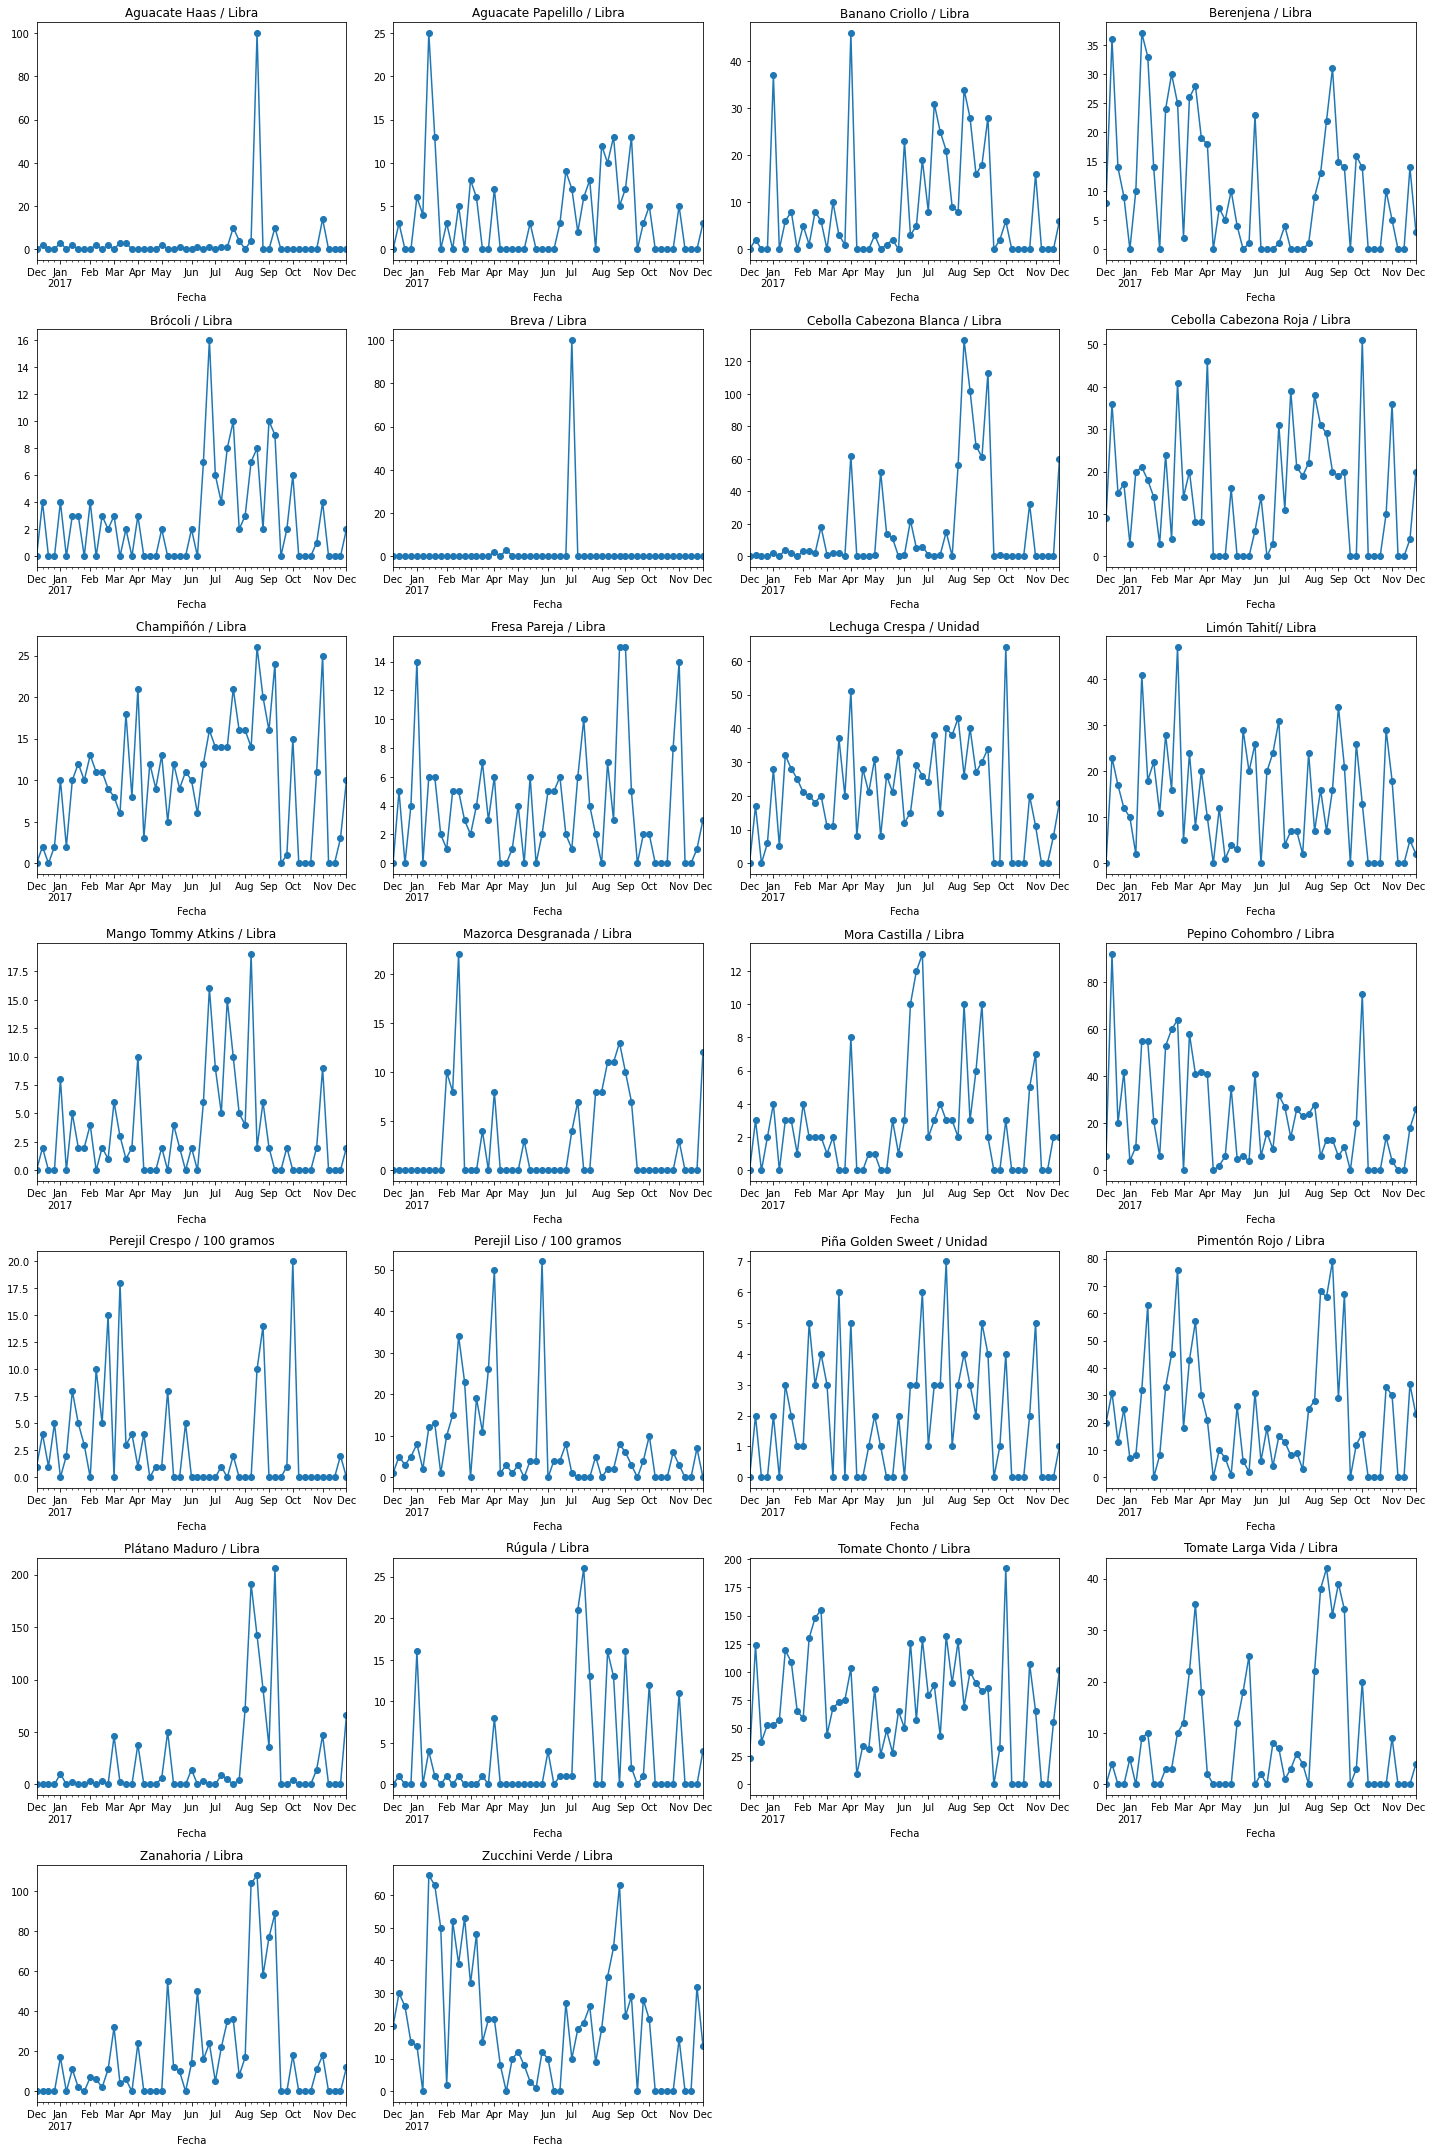

In [ ]:
columns= dff.columns
for i in range(26):
  figs = plt.subplot(7, 4, i+1)  # Tabla 3x3
  plt.tight_layout() 
  dff.iloc[:,i].plot( marker='o', figsize=(20,30), title=dff.iloc[:,i].name )


plt.show() 

In [ ]:
dff.columns.shape

(26,)

In [ ]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
productos_nm = dff.columns 
ADF=[]
for i in productos_nm: 
  result = adfuller( dff[i] ) 
  print('La serie', i) 
  print('ADF Statistic: %f' % result[0]) 
  print('p-value: %f' % result[1]) 
  print('Critical Values:') 
  print('\n')

for key, value in result[4].items(): 
  
  print('\t%s: %.3f' % (key, value))


La serie Aguacate Haas / Libra
ADF Statistic: -7.120935
p-value: 0.000000
Critical Values:


La serie Aguacate Papelillo / Libra
ADF Statistic: -3.082904
p-value: 0.027845
Critical Values:


La serie Banano Criollo / Libra
ADF Statistic: -6.095388
p-value: 0.000000
Critical Values:


La serie Berenjena / Libra
ADF Statistic: -4.597105
p-value: 0.000131
Critical Values:


La serie Brócoli / Libra
ADF Statistic: -1.960524
p-value: 0.304146
Critical Values:


La serie Breva / Libra
ADF Statistic: -7.225723
p-value: 0.000000
Critical Values:


La serie Cebolla Cabezona Blanca / Libra
ADF Statistic: -3.718104
p-value: 0.003866
Critical Values:


La serie Cebolla Cabezona Roja / Libra
ADF Statistic: -3.656738
p-value: 0.004765
Critical Values:


La serie Champiñón / Libra
ADF Statistic: -5.396542
p-value: 0.000003
Critical Values:


La serie Fresa Pareja / Libra
ADF Statistic: -5.305136
p-value: 0.000005
Critical Values:


La serie Lechuga Crespa / Unidad
ADF Statistic: -2.105437
p-value: 0.

In [ ]:
productos_nm = dff.columns 
ADF=[]
for i in productos_nm: 
  result = adfuller( dff[i] )
  ADF.append([i, result[0], result[1]]) 
  

#for key, value in result[4].items(): 
  
#  print('\t%s: %.3f' % (key, value))


In [ ]:
ADF2=pd.DataFrame(ADF,columns=['serie','ADF Statistic','p-value'])
ADF2["¿Es estacionaria?"]=["Si" if (x<= 0.05) else "No" for x in ADF2['p-value'] ]
pd.options.display.float_format = '{:.4f}'.format
ADF2[13:]

,serie,ADF Statistic,p-value,¿Es estacionaria?
13,Mazorca Desgranada / Libra,-4.2014,0.0007,Si
14,Mora Castilla / Libra,-4.8950,0.0000,Si
15,Pepino Cohombro / Libra,-6.3606,0.0000,Si
16,Perejil Crespo / 100 gramos,-7.0632,0.0000,Si
17,Perejil Liso / 100 gramos,-5.8147,0.0000,Si
18,Piña Golden Sweet / Unidad,-7.0891,0.0000,Si
19,Pimentón Rojo / Libra,-3.3697,0.0120,Si
20,Plátano Maduro / Libra,-4.3728,0.0003,Si
21,Rúgula / Libra,-5.2680,0.0000,Si
22,Tomate Chonto / Libra,-2.9045,0.0448,Si


In [ ]:
#Prueba de correlaciones
dff.corr()

,Aguacate Haas / Libra,Aguacate Papelillo / Libra,Banano Criollo / Libra,Berenjena / Libra,Brócoli / Libra,Breva / Libra,Cebolla Cabezona Blanca / Libra,Cebolla Cabezona Roja / Libra,Champiñón / Libra,Fresa Pareja / Libra,Lechuga Crespa / Unidad,Limón Tahití/ Libra,Mango Tommy Atkins / Libra,Mazorca Desgranada / Libra,Mora Castilla / Libra,Pepino Cohombro / Libra,Perejil Crespo / 100 gramos,Perejil Liso / 100 gramos,Piña Golden Sweet / Unidad,Pimentón Rojo / Libra,Plátano Maduro / Libra,Rúgula / Libra,Tomate Chonto / Libra,Tomate Larga Vida / Libra,Zanahoria / Libra,Zucchini Verde / Libra
Aguacate Haas / Libra,1.0000,0.3112,0.3086,0.1440,0.2834,-0.0333,0.4183,0.2016,0.4148,0.0463,0.2215,-0.0498,0.0244,0.2452,0.0465,-0.0555,0.1952,-0.0790,0.1747,0.3227,0.4446,0.2729,0.1315,0.4207,0.5280,0.2042
Aguacate Papelillo / Libra,0.3112,1.0000,0.4732,0.3697,0.5712,0.0922,0.4247,0.4251,0.4886,0.2992,0.4358,0.2683,0.4505,0.2522,0.3160,0.2231,0.1451,0.0558,0.4494,0.3922,0.4598,0.3397,0.4196,0.4469,0.4658,0.5482
Banano Criollo / Libra,0.3086,0.4732,1.0000,0.0145,0.6098,0.0013,0.5374,0.5213,0.6392,0.5492,0.4951,0.0276,0.6520,0.3902,0.5201,-0.0123,-0.0401,0.1692,0.5227,0.2757,0.5234,0.7378,0.2873,0.3706,0.6065,0.2415
Berenjena / Libra,0.1440,0.3697,0.0145,1.0000,-0.0155,-0.0807,0.1606,0.3550,0.1799,0.2637,0.2649,0.4986,-0.1194,0.2640,-0.0210,0.7299,0.5978,0.5301,0.2581,0.7200,0.1240,-0.1090,0.5071,0.3531,0.0598,0.7653
Brócoli / Libra,0.2834,0.5712,0.6098,-0.0155,1.0000,0.1315,0.3746,0.4620,0.6225,0.3668,0.4801,0.2146,0.6623,0.2531,0.6451,0.1078,-0.0549,-0.0649,0.6995,0.1984,0.3769,0.5567,0.4460,0.3981,0.5664,0.2189
Breva / Libra,-0.0333,0.0922,0.0013,-0.0807,0.1315,1.0000,-0.0658,-0.0357,0.0845,-0.1009,0.0419,-0.1158,0.1846,0.0349,-0.0330,0.0285,-0.0880,-0.0673,-0.0689,-0.0646,-0.0631,-0.0516,0.0257,-0.0935,-0.0670,-0.0815
Cebolla Cabezona Blanca / Libra,0.4183,0.4247,0.5374,0.1606,0.3746,-0.0658,1.0000,0.3232,0.4955,0.2716,0.3352,0.0868,0.2766,0.5550,0.3585,-0.1359,0.0496,-0.0077,0.3349,0.5791,0.9228,0.2802,0.2227,0.6853,0.8637,0.2306
Cebolla Cabezona Roja / Libra,0.2016,0.4251,0.5213,0.3550,0.4620,-0.0357,0.3232,1.0000,0.5276,0.2919,0.5760,0.2855,0.3909,0.2589,0.3593,0.5393,0.3955,0.2015,0.5851,0.4133,0.3199,0.4434,0.6961,0.3016,0.3036,0.4767
Champiñón / Libra,0.4148,0.4886,0.6392,0.1799,0.6225,0.0845,0.4955,0.5276,1.0000,0.5339,0.7886,0.2453,0.4877,0.4800,0.4688,0.1215,0.1107,0.1933,0.7106,0.4476,0.5060,0.4552,0.5553,0.5426,0.5660,0.3008
Fresa Pareja / Libra,0.0463,0.2992,0.5492,0.2637,0.3668,-0.1009,0.2716,0.2919,0.5339,1.0000,0.3077,0.3612,0.4228,0.2954,0.5435,0.0906,0.0808,0.1286,0.4993,0.3910,0.2495,0.5479,0.3084,0.4040,0.4086,0.3233


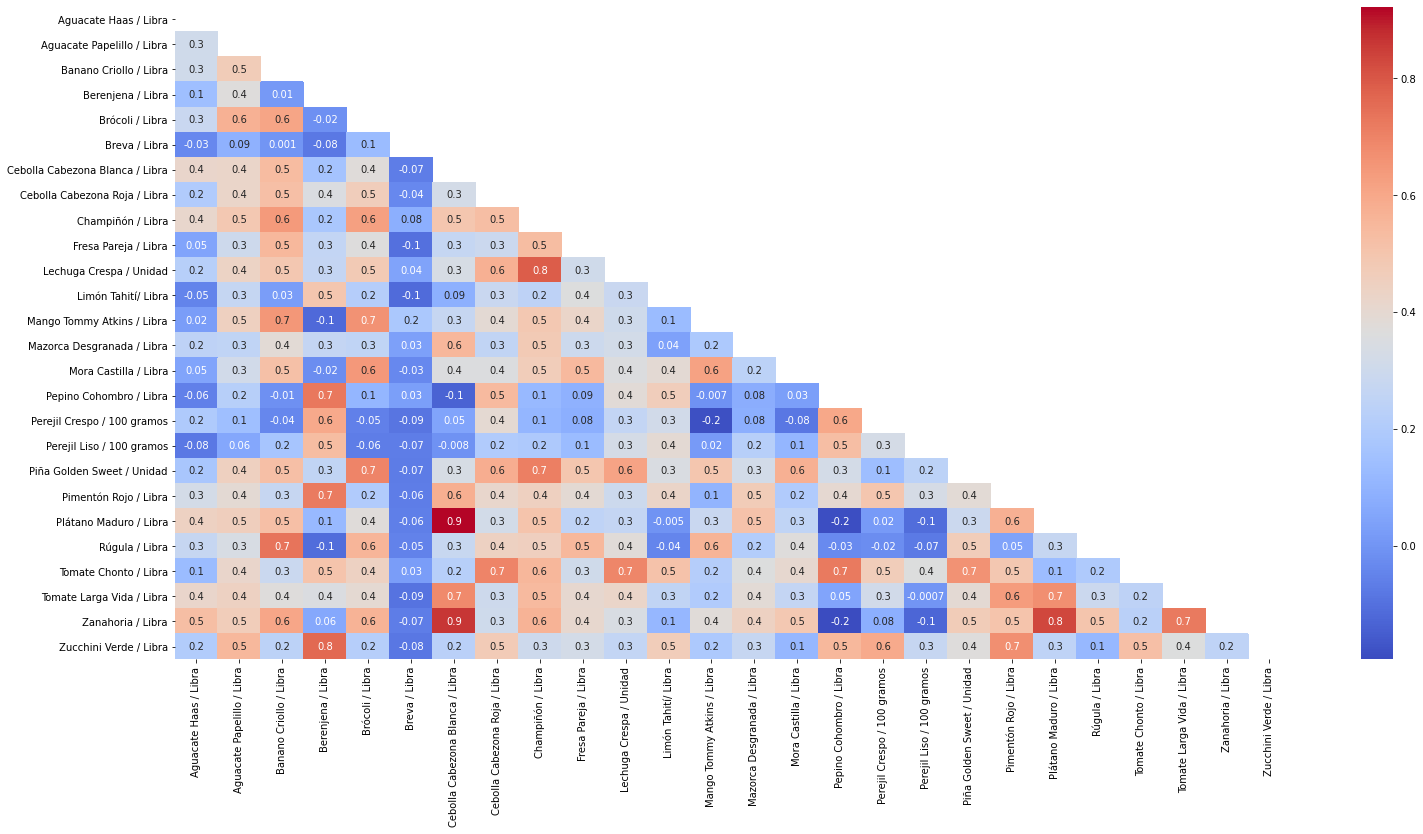

In [ ]:
import seaborn as sns
matrix = np.triu(dff.corr())
plt.figure(figsize=(25,12))
sns.heatmap(dff.corr(), annot = True, fmt='.1g', mask=matrix, cmap= 'coolwarm')


In [ ]:
dff = pd.read_excel("/content/drive/My Drive/Colab Notebooks/BASEF.xlsx")
dff.head()

,Fecha,Aguacate Haas / Libra,Aguacate Papelillo / Libra,Banano Criollo / Libra,Berenjena / Libra,Brócoli / Libra,Breva / Libra,Cebolla Cabezona Blanca / Libra,Cebolla Cabezona Roja / Libra,Champiñón / Libra,Fresa Pareja / Libra,Lechuga Crespa / Unidad,Limón Tahití/ Libra,Mango Tommy Atkins / Libra,Mazorca Desgranada / Libra,Mora Castilla / Libra,Pepino Cohombro / Libra,Perejil Crespo / 100 gramos,Perejil Liso / 100 gramos,Piña Golden Sweet / Unidad,Pimentón Rojo / Libra,Plátano Maduro / Libra,Rúgula / Libra,Tomate Chonto / Libra,Tomate Larga Vida / Libra,Zanahoria / Libra,Zucchini Verde / Libra
0,2016-12-05,0,0,0,8,0,0,0,9,0,0,0,0,0,0,0,6,1,1,0,20,0,0,23,0,0,20
1,2016-12-12,2,3,2,36,4,0,1,36,2,5,17,23,2,0,3,92,4,5,2,31,0,1,124,4,0,30
2,2016-12-19,0,0,0,14,0,0,0,15,0,0,0,17,0,0,0,20,1,3,0,13,0,0,38,0,0,26
3,2016-12-26,0,0,0,9,0,0,0,17,2,4,6,12,0,0,2,42,5,5,0,25,0,0,53,0,0,15
4,2017-01-02,3,6,37,0,4,0,2,3,10,14,28,10,8,0,4,4,0,8,2,7,10,16,53,5,17,14


In [ ]:
dff.index = pd.to_datetime(dff.Fecha)
del dff["Fecha"]
dff.head()

,Aguacate Haas / Libra,Aguacate Papelillo / Libra,Banano Criollo / Libra,Berenjena / Libra,Brócoli / Libra,Breva / Libra,Cebolla Cabezona Blanca / Libra,Cebolla Cabezona Roja / Libra,Champiñón / Libra,Fresa Pareja / Libra,Lechuga Crespa / Unidad,Limón Tahití/ Libra,Mango Tommy Atkins / Libra,Mazorca Desgranada / Libra,Mora Castilla / Libra,Pepino Cohombro / Libra,Perejil Crespo / 100 gramos,Perejil Liso / 100 gramos,Piña Golden Sweet / Unidad,Pimentón Rojo / Libra,Plátano Maduro / Libra,Rúgula / Libra,Tomate Chonto / Libra,Tomate Larga Vida / Libra,Zanahoria / Libra,Zucchini Verde / Libra
Fecha,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-12-05,0,0,0,8,0,0,0,9,0,0,0,0,0,0,0,6,1,1,0,20,0,0,23,0,0,20
2016-12-12,2,3,2,36,4,0,1,36,2,5,17,23,2,0,3,92,4,5,2,31,0,1,124,4,0,30
2016-12-19,0,0,0,14,0,0,0,15,0,0,0,17,0,0,0,20,1,3,0,13,0,0,38,0,0,26
2016-12-26,0,0,0,9,0,0,0,17,2,4,6,12,0,0,2,42,5,5,0,25,0,0,53,0,0,15
2017-01-02,3,6,37,0,4,0,2,3,10,14,28,10,8,0,4,4,0,8,2,7,10,16,53,5,17,14


De acuerdo con la prueba de Dickey Fuller, se observa que la mayoría de las series son estacionarias, excepto: BrócoliLimón Tahití, Pimentón Rojo, Plátano maduro y Zanahoria. Por lo tanto, a estos últimos productos hay que aplicarle diferencias  de primer y segundo orden para volverlas estacionarias.


Para realizar el modelo de predicción con prophet, se dividió la base de la demanda en train (desde el 01 de diciembre de 2016 al 9 de octubre de 2017) y el test con los 2 siguientes meses (desde el 10 de octubre de 2017 al 5 de diciembre del mismo año).

In [ ]:
# División base en train y test
dff_train = dff.loc["12-01-2016" : "10-09-2017"]
dff_test = dff.loc["10-10-2017" : "12-05-2017"]

In [ ]:
dff_train["Fecha"] = dff_train.index
dff_train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Aguacate Haas / Libra,Aguacate Papelillo / Libra,Banano Criollo / Libra,Berenjena / Libra,Brócoli / Libra,Breva / Libra,Cebolla Cabezona Blanca / Libra,Cebolla Cabezona Roja / Libra,Champiñón / Libra,Fresa Pareja / Libra,Lechuga Crespa / Unidad,Limón Tahití/ Libra,Mango Tommy Atkins / Libra,Mazorca Desgranada / Libra,Mora Castilla / Libra,Pepino Cohombro / Libra,Perejil Crespo / 100 gramos,Perejil Liso / 100 gramos,Piña Golden Sweet / Unidad,Pimentón Rojo / Libra,Plátano Maduro / Libra,Rúgula / Libra,Tomate Chonto / Libra,Tomate Larga Vida / Libra,Zanahoria / Libra,Zucchini Verde / Libra,Fecha
Fecha,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-12-05,0,0,0,8,0,0,0,9,0,0,0,0,0,0,0,6,1,1,0,20,0,0,23,0,0,20,2016-12-05
2016-12-12,2,3,2,36,4,0,1,36,2,5,17,23,2,0,3,92,4,5,2,31,0,1,124,4,0,30,2016-12-12
2016-12-19,0,0,0,14,0,0,0,15,0,0,0,17,0,0,0,20,1,3,0,13,0,0,38,0,0,26,2016-12-19
2016-12-26,0,0,0,9,0,0,0,17,2,4,6,12,0,0,2,42,5,5,0,25,0,0,53,0,0,15,2016-12-26
2017-01-02,3,6,37,0,4,0,2,3,10,14,28,10,8,0,4,4,0,8,2,7,10,16,53,5,17,14,2017-01-02


In [ ]:
print('train: ',dff_train.shape, 'test; ',dff_test.shape)

train:  (45, 27) test;  (8, 26)


In [ ]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

dff3 = pd.DataFrame()

dff3['ds'] = pd.to_datetime(dff_train["Fecha"])

#Se eliminan los productos que no tienen una demanda continua

productos_nm = dff_train.columns
productos_nm = productos_nm.drop(["Fecha", "Breva / Libra", "Mazorca Desgranada / Libra"])
#productos_nm=["Aguacate Haas / Libra"]
#dff3.reset_index()

In [ ]:
dict = {}
for x in productos_nm:
    dict[x] = x
print(dict)

{'Aguacate Haas / Libra': 'Aguacate Haas / Libra', 'Aguacate Papelillo / Libra': 'Aguacate Papelillo / Libra', 'Banano Criollo / Libra': 'Banano Criollo / Libra', 'Berenjena / Libra': 'Berenjena / Libra', 'Brócoli / Libra': 'Brócoli / Libra', 'Cebolla Cabezona Blanca / Libra': 'Cebolla Cabezona Blanca / Libra', 'Cebolla Cabezona Roja / Libra': 'Cebolla Cabezona Roja / Libra', 'Champiñón / Libra': 'Champiñón / Libra', 'Fresa Pareja / Libra': 'Fresa Pareja / Libra', 'Lechuga Crespa / Unidad': 'Lechuga Crespa / Unidad', 'Limón Tahití/ Libra': 'Limón Tahití/ Libra', 'Mango Tommy Atkins / Libra': 'Mango Tommy Atkins / Libra', 'Mora Castilla / Libra': 'Mora Castilla / Libra', 'Pepino Cohombro / Libra': 'Pepino Cohombro / Libra', 'Perejil Crespo / 100 gramos': 'Perejil Crespo / 100 gramos', 'Perejil Liso / 100 gramos': 'Perejil Liso / 100 gramos', 'Piña Golden Sweet / Unidad': 'Piña Golden Sweet / Unidad', 'Pimentón Rojo / Libra': 'Pimentón Rojo / Libra', 'Plátano Maduro / Libra': 'Plátano Ma

In [ ]:
#Predicción para todos los productos
future = []
model = []
fcst_all = pd.DataFrame()
fcst =[]
predicciones = {}

for i in productos_nm:  
  dff3['y'] = dff_train[i]
  #dff3['floor'] = 0
  #dff3['cap'] = 10000

  
  #m = Prophet(growth='logistic')
  m = Prophet()
  model = m.fit(dff3)
  future = model.make_future_dataframe(periods=9, freq='W')
  fcst = model.predict(future)
  predicciones[i] =fcst

  
#predicciones


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_s

In [ ]:
predicciones['Aguacate Haas / Libra'][['ds','yhat']]

,ds,yhat
0,2016-12-05,-1.6584
1,2016-12-12,-1.4248
2,2016-12-19,-1.1912
3,2016-12-26,-0.9577
4,2017-01-02,-0.7242
5,2017-01-09,-0.4906
6,2017-01-16,-0.2571
7,2017-01-23,-0.0235
8,2017-01-30,0.2100
9,2017-02-06,0.4435


In [ ]:
dff_test['Cebolla Cabezona Blanca / Libra'][-8:]

Fecha
2017-10-16     0
2017-10-23     0
2017-10-30    32
2017-11-06     0
2017-11-13     0
2017-11-20     0
2017-11-27     0
2017-12-04    60
Name: Cebolla Cabezona Blanca / Libra, dtype: int64

In [ ]:
predicciones['Cebolla Cabezona Blanca / Libra'][['ds','yhat']][-9:]

,ds,yhat
45,2017-10-15,40.8488
46,2017-10-22,41.8924
47,2017-10-29,42.9361
48,2017-11-05,43.9797
49,2017-11-12,45.0234
50,2017-11-19,46.0670
51,2017-11-26,47.1107
52,2017-12-03,48.1544
53,2017-12-10,49.1980


In [ ]:
#Crear Data frame con la predicción para cada producto y su MSE (el error fue evaluado comparando la predicción de  semanas con prophet y los datos de test )
from sklearn.metrics import mean_squared_error
prediccion_semana =  pd.DataFrame()
temp = pd.DataFrame()

for i in  predicciones:
     prediccion_semana= predicciones[i][['yhat']][-1:]
     prediccion_semana['Fecha 10 dic'] = predicciones[i][['ds']][-1:]
     prediccion_semana['Pedido 3 dic'] = dff_test[i][-1]
     prediccion_semana["Nombre producto"] = i
     prediccion_semana['mse'] = mean_squared_error(dff_test[i][-8:] , predicciones[i][['yhat']][-9:-1] )
     prediccion_semana['rmse'] = np.sqrt(prediccion_semana['mse'])
     temp = temp.append(prediccion_semana)


In [ ]:
temp

,yhat,Fecha 10 dic,Pedido 3 dic,Nombre producto,mse,rmse
53,10.6857,2017-12-10,0,Aguacate Haas / Libra,84.3024,9.1816
53,5.4030,2017-12-10,3,Aguacate Papelillo / Libra,20.9676,4.5790
53,17.1932,2017-12-10,6,Banano Criollo / Libra,205.3800,14.3311
53,3.4846,2017-12-10,3,Berenjena / Libra,27.9071,5.2827
53,6.4129,2017-12-10,2,Brócoli / Libra,27.2407,5.2193
53,49.1980,2017-12-10,60,Cebolla Cabezona Blanca / Libra,1498.3034,38.7079
53,18.4586,2017-12-10,20,Cebolla Cabezona Roja / Libra,235.7571,15.3544
53,16.8386,2017-12-10,10,Champiñón / Libra,165.3331,12.8582
53,4.6848,2017-12-10,3,Fresa Pareja / Libra,24.9775,4.9978
53,32.6371,2017-12-10,18,Lechuga Crespa / Unidad,639.7174,25.2926


In [ ]:
#OJO NO BORRAR

#from google.colab import files
#temp.to_csv('resultados_prophet.csv', index_label='ID')
#files.download('resultados_prophet.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

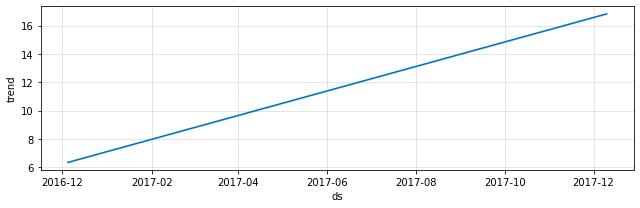

In [ ]:
fig2 = m.plot_components(predicciones['Champiñón / Libra'])

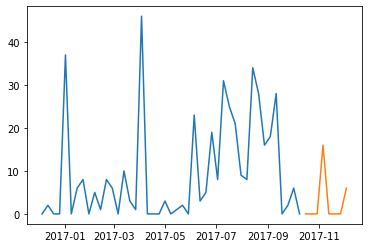

In [ ]:
#dff_test[i][-8:] , predicciones[i][['yhat']][-9:-1] 
plt.plot(dff_train['Banano Criollo / Libra'][:])
plt.plot(dff_test['Banano Criollo / Libra'][-8:])
#plt.plot(predicciones['Banano Criollo / Libra'][['yhat']][-9:-1], color='red')
plt.show()

In [ ]:
list(dff_test['Banano Criollo / Libra'][-8:])

[0, 0, 0, 16, 0, 0, 0, 6]

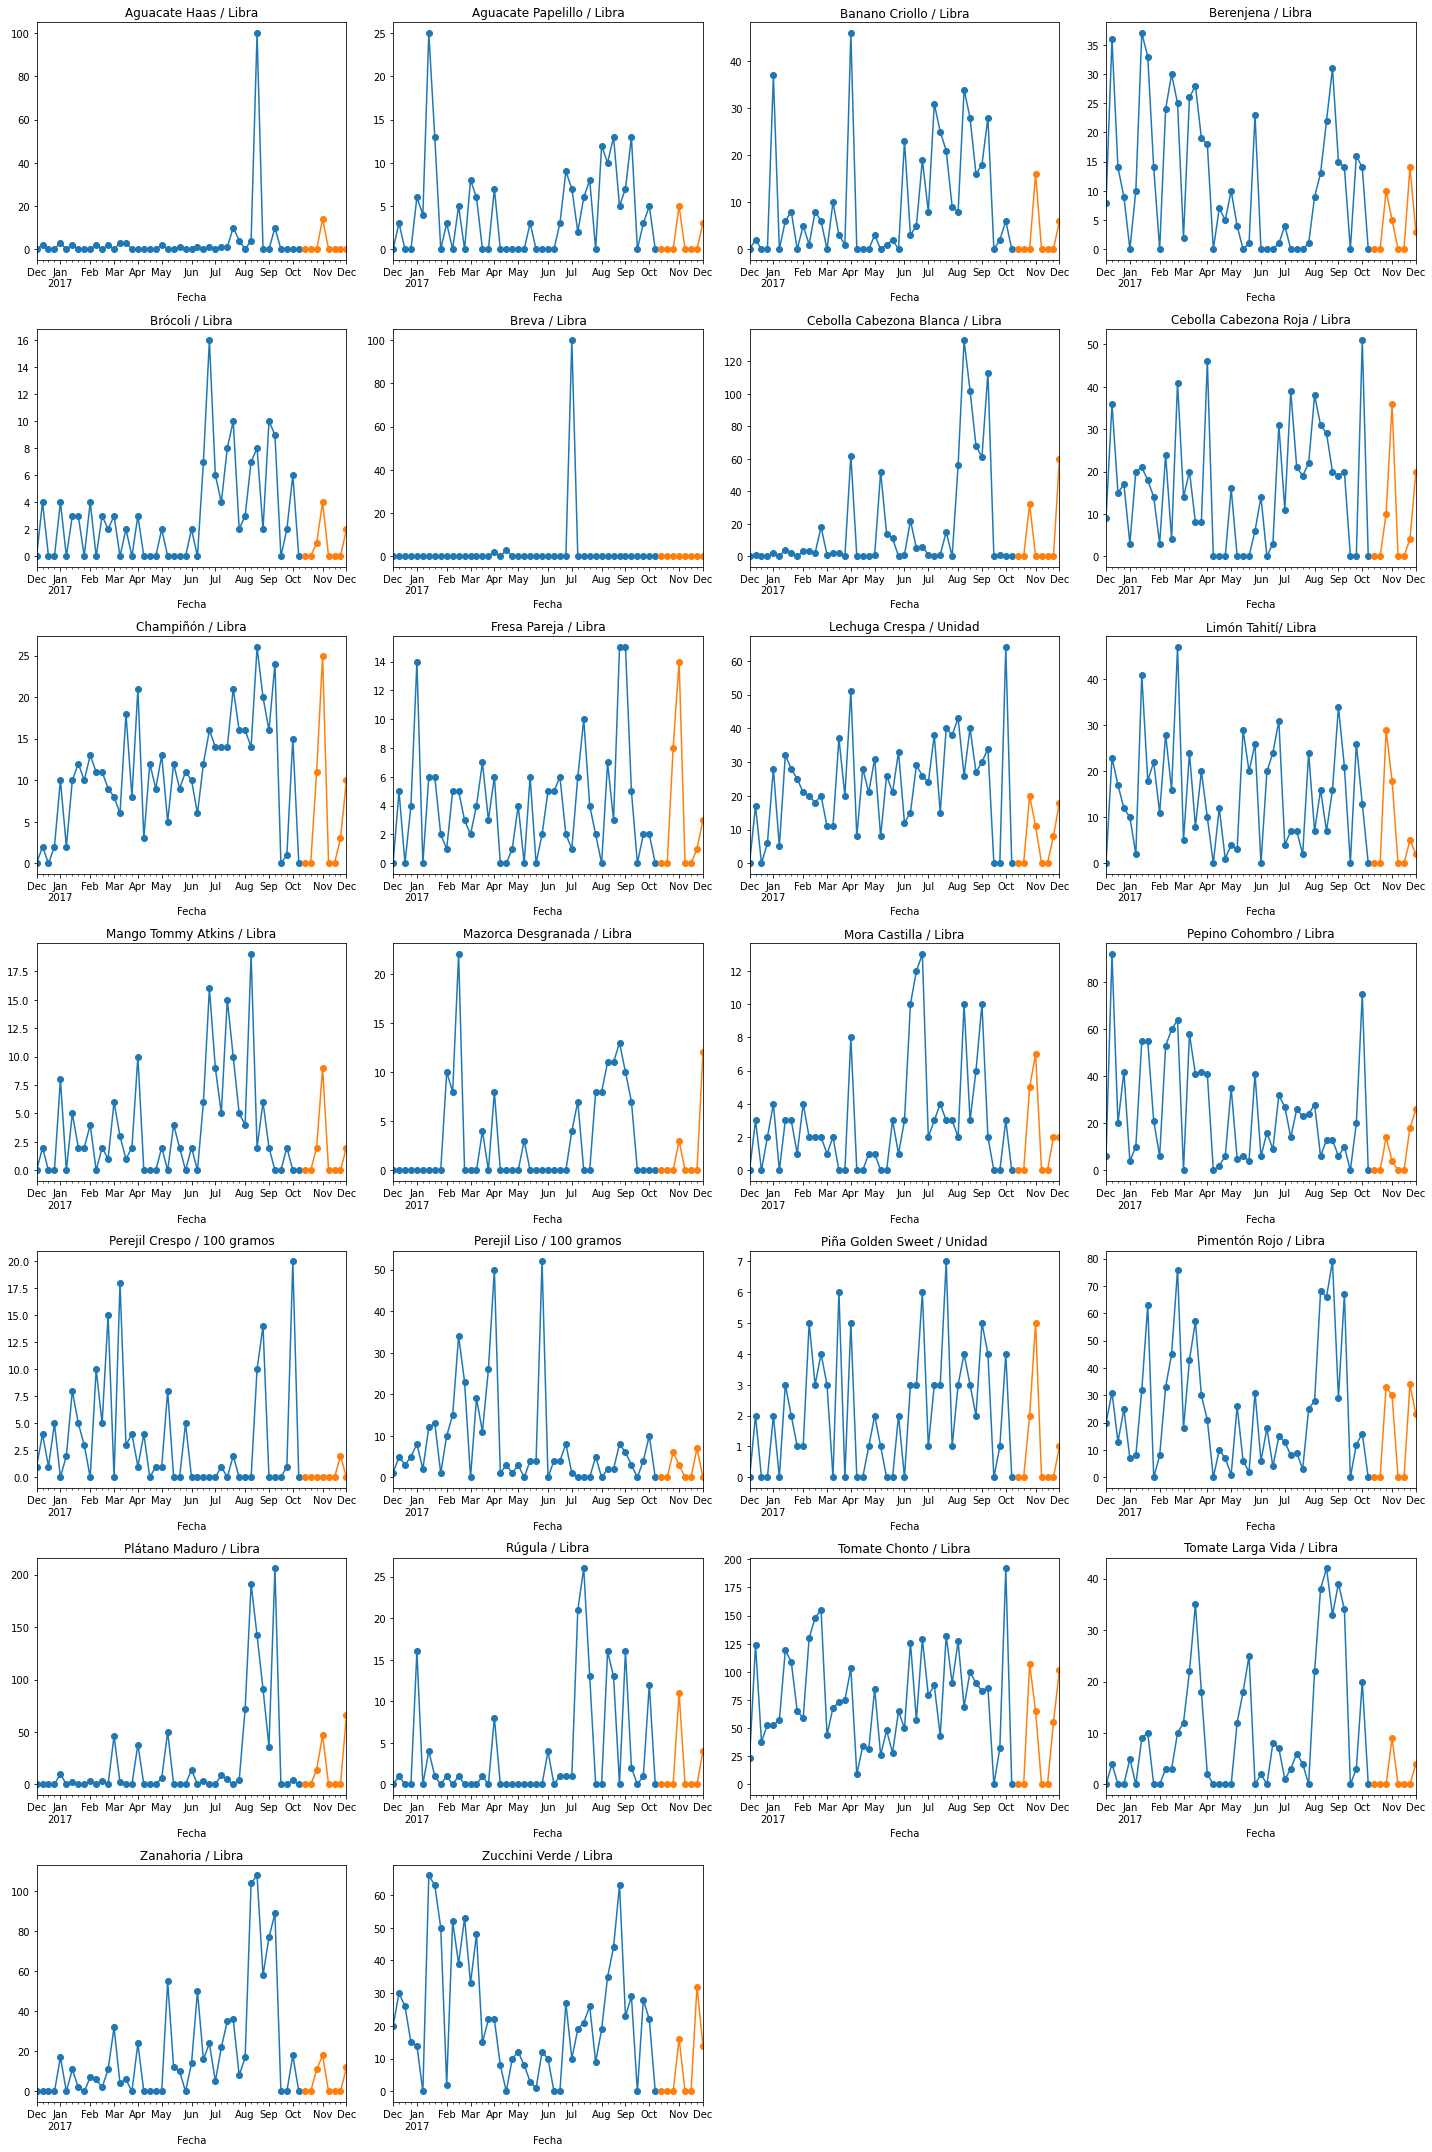

In [ ]:
columns= dff.columns
for i in range(26):
  figs = plt.subplot(7, 4, i+1)  # Tabla 3x3
  plt.tight_layout() 
  dff_train.iloc[:,i].plot( marker='o', figsize=(20,30), title=dff_train.iloc[:,i].name )
  dff_test.iloc[-8:,i].plot( marker='o', figsize=(20,30) )
  


plt.show() 

In [ ]:
predicciones['Banano Criollo / Libra'][['yhat']][-9:-1]

,yhat
45,15.163428
46,15.417155
47,15.670882
48,15.924608
49,16.178335
50,16.432062
51,16.685788
52,16.939515


#### Prueba 2 mse

In [ ]:
predicciones['Piña Golden Sweet / Unidad'][['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-8:]

,ds,yhat,yhat_lower,yhat_upper
35,2017-08-06,2.822517,0.481318,5.062102
36,2017-08-13,2.864029,0.600685,5.281995
37,2017-08-20,2.905541,0.360167,5.404734
38,2017-08-27,2.947053,0.572526,5.303422
39,2017-09-03,2.988565,0.545963,5.420902
40,2017-09-10,3.030078,0.658314,5.299579
41,2017-09-17,3.071590,0.530565,5.577971
42,2017-09-24,3.113102,0.698918,5.517497


In [ ]:
nombre_prueba_test = dff_test['Piña Golden Sweet / Unidad'][-8:]
nombre_prueba_test

Fecha
2017-08-07    4
2017-08-14    3
2017-08-21    2
2017-08-28    5
2017-09-04    4
2017-09-11    0
2017-09-18    1
2017-09-25    4
Name: Piña Golden Sweet / Unidad, dtype: int64

In [ ]:
nombre_prueba_pred= predicciones['Piña Golden Sweet / Unidad'][['yhat']][-8:] 
nombre_prueba_pred

,yhat
35,2.822517
36,2.864029
37,2.905541
38,2.947053
39,2.988565
40,3.030078
41,3.071590
42,3.113102


In [ ]:
 mean_squared_error(nombre_prueba_test , nombre_prueba_pred)

2.715248922969377

### **Red neuronal**

Base de datos en semanas

In [ ]:
df = pd.read_excel("/content/drive/My Drive/Colab Notebooks/BaseAgroDiaria.xlsx")
df.head()

,Fecha,Nombre_producto,Pedido
0,2016-01-12,Aguacate Haas / Libra,0
1,2016-01-13,Aguacate Haas / Libra,0
2,2016-01-14,Aguacate Haas / Libra,0
3,2016-01-15,Aguacate Haas / Libra,0
4,2016-01-16,Aguacate Haas / Libra,0


In [ ]:
df['Fecha'] = df['Fecha'] - pd.to_timedelta(7, unit='d')
df.head()

,Fecha,Nombre_producto,Pedido
0,2016-01-05,Aguacate Haas / Libra,0
1,2016-01-06,Aguacate Haas / Libra,0
2,2016-01-07,Aguacate Haas / Libra,0
3,2016-01-08,Aguacate Haas / Libra,0
4,2016-01-09,Aguacate Haas / Libra,0


In [ ]:
#Se agruparon los datos en semanas

df = df.groupby(['Nombre_producto', pd.Grouper(key='Fecha', freq='W-MON')])['Pedido'].sum().reset_index().sort_values('Fecha')
df.head()

,Nombre_producto,Fecha,Pedido
0,Aguacate Haas / Libra,2016-01-11,0
1100,Limón Tahití/ Libra,2016-01-11,0
1300,Mazorca Desgranada / Libra,2016-01-11,0
2200,Tomate Chonto / Libra,2016-01-11,3
100,Aguacate Papelillo / Libra,2016-01-11,0


In [ ]:
df.index = pd.to_datetime(df.Fecha)
del df["Fecha"]
df.head()

,Nombre_producto,Pedido
Fecha,,
2016-01-11,Aguacate Haas / Libra,0
2016-01-11,Limón Tahití/ Libra,0
2016-01-11,Mazorca Desgranada / Libra,0
2016-01-11,Tomate Chonto / Libra,3
2016-01-11,Aguacate Papelillo / Libra,0


In [ ]:
dff = df.loc["12-01-2016": ]
dff.head()

,Nombre_producto,Pedido
Fecha,,
2016-12-05,Cebolla Cabezona Blanca / Libra,0
2016-12-05,Tomate Chonto / Libra,23
2016-12-05,Aguacate Haas / Libra,0
2016-12-05,Fresa Pareja / Libra,0
2016-12-05,Mango Tommy Atkins / Libra,0


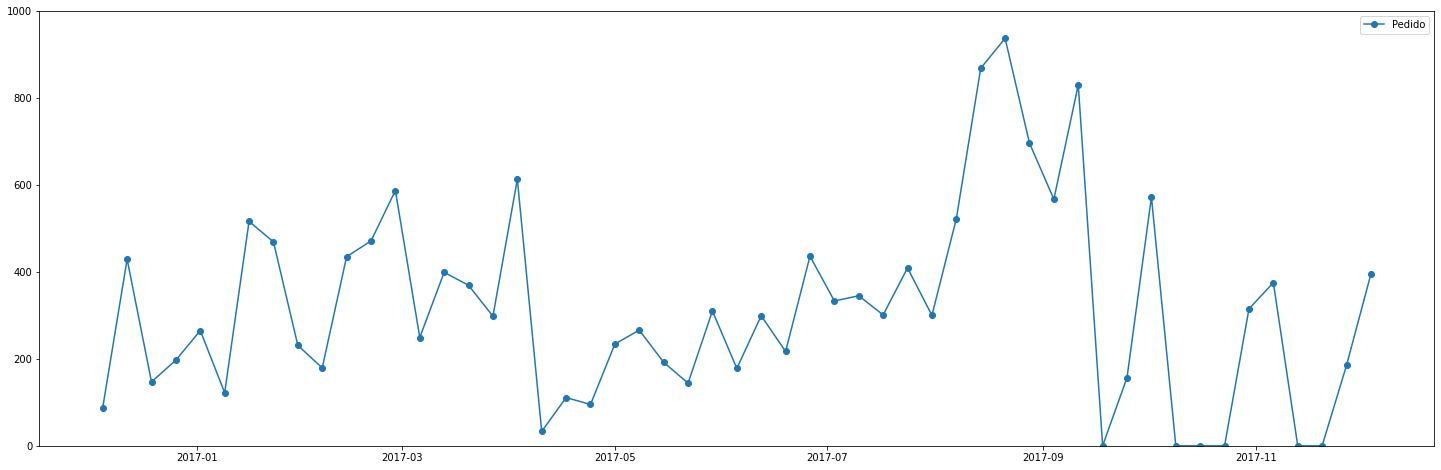

In [ ]:
df_consolidado = pd.DataFrame(dff["Pedido"].groupby(dff.index.date).sum())
df_consolidado.plot(ylim=(0,1000), figsize=(25,8) , marker='o')

In [ ]:
from google.colab import files
dff.to_csv('final.csv', index_label='ID')
files.download('final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Base Final 

In [ ]:
dff = pd.read_excel("/content/drive/My Drive/Colab Notebooks/BASEF.xlsx")
dff.head()

,Fecha,Aguacate Haas / Libra,Aguacate Papelillo / Libra,Banano Criollo / Libra,Berenjena / Libra,Brócoli / Libra,Breva / Libra,Cebolla Cabezona Blanca / Libra,Cebolla Cabezona Roja / Libra,Champiñón / Libra,Fresa Pareja / Libra,Lechuga Crespa / Unidad,Limón Tahití/ Libra,Mango Tommy Atkins / Libra,Mazorca Desgranada / Libra,Mora Castilla / Libra,Pepino Cohombro / Libra,Perejil Crespo / 100 gramos,Perejil Liso / 100 gramos,Piña Golden Sweet / Unidad,Pimentón Rojo / Libra,Plátano Maduro / Libra,Rúgula / Libra,Tomate Chonto / Libra,Tomate Larga Vida / Libra,Zanahoria / Libra,Zucchini Verde / Libra
0,2016-12-05,0,0,0,8,0,0,0,9,0,0,0,0,0,0,0,6,1,1,0,20,0,0,23,0,0,20
1,2016-12-12,2,3,2,36,4,0,1,36,2,5,17,23,2,0,3,92,4,5,2,31,0,1,124,4,0,30
2,2016-12-19,0,0,0,14,0,0,0,15,0,0,0,17,0,0,0,20,1,3,0,13,0,0,38,0,0,26
3,2016-12-26,0,0,0,9,0,0,0,17,2,4,6,12,0,0,2,42,5,5,0,25,0,0,53,0,0,15
4,2017-01-02,3,6,37,0,4,0,2,3,10,14,28,10,8,0,4,4,0,8,2,7,10,16,53,5,17,14


In [ ]:
dff['Fecha'] =pd.to_datetime(dff['Fecha'])

In [ ]:
dff.index = pd.to_datetime(dff.Fecha)
del dff["Fecha"]
dff.head()

,Aguacate Haas / Libra,Aguacate Papelillo / Libra,Banano Criollo / Libra,Berenjena / Libra,Brócoli / Libra,Breva / Libra,Cebolla Cabezona Blanca / Libra,Cebolla Cabezona Roja / Libra,Champiñón / Libra,Fresa Pareja / Libra,Lechuga Crespa / Unidad,Limón Tahití/ Libra,Mango Tommy Atkins / Libra,Mazorca Desgranada / Libra,Mora Castilla / Libra,Pepino Cohombro / Libra,Perejil Crespo / 100 gramos,Perejil Liso / 100 gramos,Piña Golden Sweet / Unidad,Pimentón Rojo / Libra,Plátano Maduro / Libra,Rúgula / Libra,Tomate Chonto / Libra,Tomate Larga Vida / Libra,Zanahoria / Libra,Zucchini Verde / Libra
Fecha,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-12-05,0,0,0,8,0,0,0,9,0,0,0,0,0,0,0,6,1,1,0,20,0,0,23,0,0,20
2016-12-12,2,3,2,36,4,0,1,36,2,5,17,23,2,0,3,92,4,5,2,31,0,1,124,4,0,30
2016-12-19,0,0,0,14,0,0,0,15,0,0,0,17,0,0,0,20,1,3,0,13,0,0,38,0,0,26
2016-12-26,0,0,0,9,0,0,0,17,2,4,6,12,0,0,2,42,5,5,0,25,0,0,53,0,0,15
2017-01-02,3,6,37,0,4,0,2,3,10,14,28,10,8,0,4,4,0,8,2,7,10,16,53,5,17,14


In [ ]:
print(dff.index.min())
print(dff.index.max())

2016-12-05 00:00:00
2017-12-04 00:00:00


In [ ]:
Pedido_productos = dff.copy()
Pedido_productos = Pedido_productos.T
Pedido_productos['avg_pedido'] = Pedido_productos.apply(lambda r: r.mean(), axis=1)
Pedido_productos.head()

Fecha,2016-12-05 00:00:00,2016-12-12 00:00:00,2016-12-19 00:00:00,2016-12-26 00:00:00,2017-01-02 00:00:00,2017-01-09 00:00:00,2017-01-16 00:00:00,2017-01-23 00:00:00,2017-01-30 00:00:00,2017-02-06 00:00:00,2017-02-13 00:00:00,2017-02-20 00:00:00,2017-02-27 00:00:00,2017-03-06 00:00:00,2017-03-13 00:00:00,2017-03-20 00:00:00,2017-03-27 00:00:00,2017-04-03 00:00:00,2017-04-10 00:00:00,2017-04-17 00:00:00,2017-04-24 00:00:00,2017-05-01 00:00:00,2017-05-08 00:00:00,2017-05-15 00:00:00,2017-05-22 00:00:00,2017-05-29 00:00:00,2017-06-05 00:00:00,2017-06-12 00:00:00,2017-06-19 00:00:00,2017-06-26 00:00:00,2017-07-03 00:00:00,2017-07-10 00:00:00,2017-07-17 00:00:00,2017-07-24 00:00:00,2017-07-31 00:00:00,2017-08-07 00:00:00,2017-08-14 00:00:00,2017-08-21 00:00:00,2017-08-28 00:00:00,2017-09-04 00:00:00,2017-09-11 00:00:00,2017-09-18 00:00:00,2017-09-25 00:00:00,2017-10-02 00:00:00,2017-10-09 00:00:00,2017-10-16 00:00:00,2017-10-23 00:00:00,2017-10-30 00:00:00,2017-11-06 00:00:00,2017-11-13 00:00:00,2017-11-20 00:00:00,2017-11-27 00:00:00,2017-12-04 00:00:00,avg_pedido
Aguacate Haas / Libra,0,2,0,0,3,0,2,0,0,0,2,0,2,0,3,3,0,0,0,0,0,2,0,0,1,0,0,1,0,1,0,1,1,10,4,0,4,100,0,0,10,0,0,0,0,0,0,0,14,0,0,0,0,3.132075
Aguacate Papelillo / Libra,0,3,0,0,6,4,25,13,0,3,0,5,0,8,6,0,0,7,0,0,0,0,0,3,0,0,0,0,3,9,7,2,6,8,0,12,10,13,5,7,13,0,3,5,0,0,0,0,5,0,0,0,3,3.660377
Banano Criollo / Libra,0,2,0,0,37,0,6,8,0,5,1,8,6,0,10,3,1,46,0,0,0,3,0,1,2,0,23,3,5,19,8,31,25,21,9,8,34,28,16,18,28,0,2,6,0,0,0,0,16,0,0,0,6,8.396226
Berenjena / Libra,8,36,14,9,0,10,37,33,14,0,24,30,25,2,26,28,19,18,0,7,5,10,4,0,1,23,0,0,0,1,4,0,0,0,1,9,13,22,31,15,14,0,16,14,0,0,0,10,5,0,0,14,3,10.471698
Brócoli / Libra,0,4,0,0,4,0,3,3,0,4,0,3,2,3,0,2,0,3,0,0,0,2,0,0,0,0,2,0,7,16,6,4,8,10,2,3,7,8,2,10,9,0,2,6,0,0,0,1,4,0,0,0,2,2.679245


In [ ]:
import plotly.offline as py
import plotly.graph_objs as go

# Scatter plot of average sales per store
pedido_producto_data = go.Scatter(
    y = Pedido_productos.avg_pedido.values,
    mode='markers',
    marker=dict(
        size = Pedido_productos.avg_pedido.values,
        color = Pedido_productos.avg_pedido.values,
        colorscale='Viridis',
        showscale=True
    ),
    text = Pedido_productos.index.values
)
data = [pedido_producto_data]

sales_store_layout = go.Layout(
    autosize= True,
    title= 'Scatter plot of avg demand per product',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Products',
        ticklen= 10,
        zeroline= False,
        gridwidth= 1,
    ),
    yaxis=dict(
        title= 'Avg Pedido',
        ticklen= 10,
        zeroline= False,
        gridwidth= 1,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=sales_store_layout)
py.iplot(fig,filename='scatter_demand_products')

Red Neuronal 1 

In [ ]:
dff.head()

,Aguacate Haas / Libra,Aguacate Papelillo / Libra,Banano Criollo / Libra,Berenjena / Libra,Brócoli / Libra,Breva / Libra,Cebolla Cabezona Blanca / Libra,Cebolla Cabezona Roja / Libra,Champiñón / Libra,Fresa Pareja / Libra,Lechuga Crespa / Unidad,Limón Tahití/ Libra,Mango Tommy Atkins / Libra,Mazorca Desgranada / Libra,Mora Castilla / Libra,Pepino Cohombro / Libra,Perejil Crespo / 100 gramos,Perejil Liso / 100 gramos,Piña Golden Sweet / Unidad,Pimentón Rojo / Libra,Plátano Maduro / Libra,Rúgula / Libra,Tomate Chonto / Libra,Tomate Larga Vida / Libra,Zanahoria / Libra,Zucchini Verde / Libra
Fecha,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-12-05,0,0,0,8,0,0,0,9,0,0,0,0,0,0,0,6,1,1,0,20,0,0,23,0,0,20
2016-12-12,2,3,2,36,4,0,1,36,2,5,17,23,2,0,3,92,4,5,2,31,0,1,124,4,0,30
2016-12-19,0,0,0,14,0,0,0,15,0,0,0,17,0,0,0,20,1,3,0,13,0,0,38,0,0,26
2016-12-26,0,0,0,9,0,0,0,17,2,4,6,12,0,0,2,42,5,5,0,25,0,0,53,0,0,15
2017-01-02,3,6,37,0,4,0,2,3,10,14,28,10,8,0,4,4,0,8,2,7,10,16,53,5,17,14


In [ ]:
dff['Tomate Chonto / Libra'].tail()

Fecha
2017-11-06     65
2017-11-13      0
2017-11-20      0
2017-11-27     55
2017-12-04    102
Name: Tomate Chonto / Libra, dtype: int64

In [ ]:
# LSTM  para predecir  la demanda semanal de los productos más importantes
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.callbacks import EarlyStopping
from keras.layers.core import Dense, Activation, Dropout
from tensorflow import keras


In [ ]:
#TODOS LOS PRODUCTOS

#productos_nm=["Aguacate Haas / Libra"]
productos_nm =dff.columns

df1=pd.DataFrame()
temp = pd.DataFrame()
dfres=pd.DataFrame()
predicciones= {}
rmse_test ={}
rmse_train={}

rsq =[]

for i in productos_nm:
  #create a new dataframe to model the difference
  df1['Pedido'] = dff[i].copy()

  # convertimos un array de valores en una matriz de conjuntos de datos
  def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    #for i in range(len(dataset)-look_back-1):
    for i in range(len(dataset)-look_back):
      a = dataset[i:(i+look_back), 0]
      dataX.append(a)
      dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

  # semilla aleatoria para reproducibilidad
  numpy.random.seed(7)

  # normalizamos el conjunto de datos
  scaler = MinMaxScaler(feature_range=(0, 1)) # los datos se deben normalizar por que las LSTM son sensibles a las escalas de datos de entrada
  dataset = scaler.fit_transform(df1) 

  # dividimos entre entranmiento y test
  train_size = int(len(dataset) * 0.67)
  test_size = len(dataset) - train_size 
  train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

  # remodelamos X=t y Y=t+1
  look_back = 1
  trainX, trainY = create_dataset(train, look_back)
  testX, testY = create_dataset(test, look_back)  

  # remodelamos la entrada para que sea[muestras, pasos de tiempo, características]
  trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
  testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
  #creamos la LSTM network
  model = Sequential()
  #model.add(LSTM(5, input_shape=(5, look_back)))
  model.add(LSTM(25, input_shape=(1,look_back)))
  model.add(Dropout(0.5))
  #model.add(Dense(1))
  model.add(Activation("relu"))
  model.add(Dense(1))
  opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.15)
  model.compile(loss='mean_squared_error', optimizer=opt)
  history = model.fit(trainX, trainY, epochs=40, batch_size=20, verbose=2, validation_data=(testX, testY), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)],  shuffle=False)
  # hacemos las predicciones
  trainPredict = model.predict(trainX)
  testPredict = model.predict(testX)

  # invertimos las predicciones
  trainPredict = scaler.inverse_transform(trainPredict)
  trainY = scaler.inverse_transform([trainY])
  testPredict = scaler.inverse_transform(testPredict)
  testY = scaler.inverse_transform([testY])

  # calculamos el error rms
  trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
  testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

  # predicciones del entrenamiento de cambio para plotear
  trainPredictPlot = numpy.empty_like(dataset)
  trainPredictPlot[:, :] = numpy.nan
  trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

  # predicciones del test de cambio para plotear
  testPredictPlot = numpy.empty_like(dataset)
  testPredictPlot[:, :] = numpy.nan
  testPredictPlot[len(trainPredict)+(look_back):len(dataset)-1, :] = testPredict
  
  #Resultados tabla
  rmse_test[i]= testScore
  rmse_train[i]=trainScore
  predicciones[i] = testPredict

  dfres['Fecha'] = dff.index[-1]
  dfres["Nombre"] = i
  dfres['Yhat'] = predicciones[i][-1]
  dfres['mse'] = rmse_test[i]
  temp = temp.append(dfres)
  
print(temp)

Epoch 1/40
2/2 - 0s - loss: 4.9264e-04 - val_loss: 0.0607
Epoch 2/40
2/2 - 0s - loss: 4.5221e-04 - val_loss: 0.0603
Epoch 3/40
2/2 - 0s - loss: 4.2906e-04 - val_loss: 0.0600
Epoch 4/40
2/2 - 0s - loss: 4.0027e-04 - val_loss: 0.0598
Epoch 5/40
2/2 - 0s - loss: 4.0132e-04 - val_loss: 0.0596
Epoch 6/40
2/2 - 0s - loss: 3.7607e-04 - val_loss: 0.0594
Epoch 7/40
2/2 - 0s - loss: 3.8427e-04 - val_loss: 0.0593
Epoch 8/40
2/2 - 0s - loss: 3.7048e-04 - val_loss: 0.0592
Epoch 9/40
2/2 - 0s - loss: 3.6451e-04 - val_loss: 0.0591
Epoch 10/40
2/2 - 0s - loss: 3.7451e-04 - val_loss: 0.0591
Epoch 11/40
2/2 - 0s - loss: 3.7312e-04 - val_loss: 0.0591
Epoch 12/40
2/2 - 0s - loss: 3.6371e-04 - val_loss: 0.0591
Epoch 13/40
2/2 - 0s - loss: 3.8083e-04 - val_loss: 0.0590
Epoch 14/40
2/2 - 0s - loss: 3.7139e-04 - val_loss: 0.0590
Epoch 15/40
2/2 - 0s - loss: 3.8167e-04 - val_loss: 0.0590
Epoch 16/40
2/2 - 0s - loss: 3.7909e-04 - val_loss: 0.0590
Epoch 17/40
2/2 - 0s - loss: 3.7500e-04 - val_loss: 0.0590
Epoch 

Epoch 1/40
2/2 - 0s - loss: 0.1796 - val_loss: 0.1488
Epoch 2/40
2/2 - 0s - loss: 0.1842 - val_loss: 0.1464
Epoch 3/40
2/2 - 0s - loss: 0.1802 - val_loss: 0.1440
Epoch 4/40
2/2 - 0s - loss: 0.1771 - val_loss: 0.1415
Epoch 5/40
2/2 - 0s - loss: 0.1704 - val_loss: 0.1391
Epoch 6/40
2/2 - 0s - loss: 0.1649 - val_loss: 0.1370
Epoch 7/40
2/2 - 0s - loss: 0.1622 - val_loss: 0.1348
Epoch 8/40
2/2 - 0s - loss: 0.1644 - val_loss: 0.1327
Epoch 9/40
2/2 - 0s - loss: 0.1524 - val_loss: 0.1305
Epoch 10/40
2/2 - 0s - loss: 0.1526 - val_loss: 0.1285
Epoch 11/40
2/2 - 0s - loss: 0.1553 - val_loss: 0.1265
Epoch 12/40
2/2 - 0s - loss: 0.1512 - val_loss: 0.1246
Epoch 13/40
2/2 - 0s - loss: 0.1380 - val_loss: 0.1226
Epoch 14/40
2/2 - 0s - loss: 0.1392 - val_loss: 0.1207
Epoch 15/40
2/2 - 0s - loss: 0.1392 - val_loss: 0.1188
Epoch 16/40
2/2 - 0s - loss: 0.1329 - val_loss: 0.1170
Epoch 17/40
2/2 - 0s - loss: 0.1225 - val_loss: 0.1152
Epoch 18/40
2/2 - 0s - loss: 0.1333 - val_loss: 0.1135
Epoch 19/40
2/2 - 0

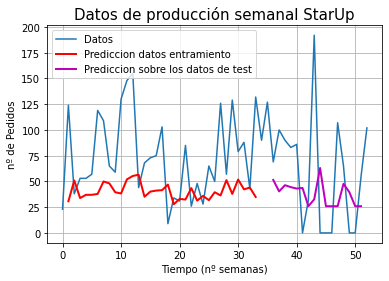

Resultado del test: 56.85 RMSE
Resultado del entrenamiento: 52.27 RMSE


In [ ]:
productos_nm=["Tomate Chonto / Libra"]

df1=pd.DataFrame()

rsq =[]

for i in productos_nm:
  #create a new dataframe to model the difference
  df1['Pedido'] = dff[i].copy()

  # convertimos un array de valores en una matriz de conjuntos de datos
  def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
      a = dataset[i:(i+look_back), 0]
      dataX.append(a)
      dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

  # semilla aleatoria para reproducibilidad
  np.random.seed(7)

  # normalizamos el conjunto de datos
  scaler = MinMaxScaler(feature_range=(0, 1))
  dataset = scaler.fit_transform(df1) 

  # dividimos entre entranmiento y test
  train_size = int(len(dataset) * 0.67)
  test_size = len(dataset) - train_size 
  train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

  # remodelamos X=t y Y=t+1
  look_back = 1
  trainX, trainY = create_dataset(train, look_back)
  testX, testY = create_dataset(test, look_back)  

  # remodelamos la entrada para que sea[muestras, pasos de tiempo, características]
  trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
  testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
  
  model = Sequential()
  #model.add(LSTM(5, input_shape=(5, look_back)))
  model.add(LSTM(25, input_shape=(1,look_back)))
  model.add(Dropout(0.5))
  #model.add(Dense(1))
  model.add(Activation("relu"))
  model.add(Dense(1))
  opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.15)
  model.compile(loss='mean_squared_error', optimizer=opt)
  
  history = model.fit(trainX, trainY, epochs=40, batch_size=20, verbose=2, validation_data=(testX, testY), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)],  shuffle=False)
  # hacemos las predicciones
  trainPredict = model.predict(trainX)
  testPredict = model.predict(testX)

  # invertimos las predicciones
  trainPredict = scaler.inverse_transform(trainPredict)
  trainY = scaler.inverse_transform([trainY])
  testPredict = scaler.inverse_transform(testPredict)
  testY = scaler.inverse_transform([testY])

  # calculamos el error rms
  trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
  testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

  # predicciones del entrenamiento de cambio para plotear
  trainPredictPlot = numpy.empty_like(dataset)
  trainPredictPlot[:, :] = numpy.nan
  trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

  # predicciones del test de cambio para plotear
  testPredictPlot = numpy.empty_like(dataset)
  testPredictPlot[:, :] = numpy.nan
  testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
  
  # plot baseline and predictions
  plt.plot(scaler.inverse_transform(dataset))
  # ploteamos linea base y predicciones
  plt.plot(trainPredictPlot,'r', linewidth = 2)
  plt.plot(testPredictPlot,'m', linewidth = 2)
  plt.legend( ('Datos', 'Prediccion datos entramiento', 'Prediccion sobre los datos de test'), loc = 'upper left')
  plt.grid(True)
  plt.title("Datos de producción semanal StarUp", fontsize = 15)
  plt.xlabel("Tiempo (nº semanas)", fontsize = 10)
  plt.ylabel("nº de Pedidos", fontsize = 10)
  plt.show()

print('Resultado del test: %.2f RMSE' % (testScore))
print('Resultado del entrenamiento: %.2f RMSE' % (trainScore))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 25)                2700      
_________________________________________________________________
dropout (Dropout)            (None, 25)                0         
_________________________________________________________________
activation (Activation)      (None, 25)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 26        
Total params: 2,726
Trainable params: 2,726
Non-trainable params: 0
_________________________________________________________________


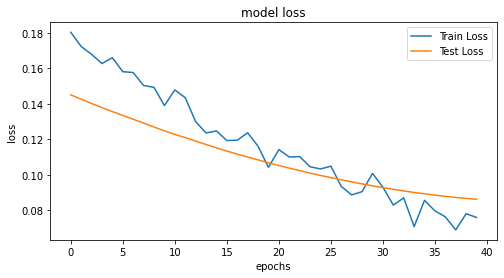

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

Predicción

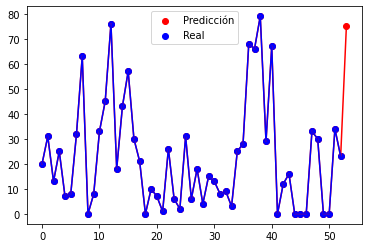

array([[75.183235]], dtype=float32)

In [ ]:
from matplotlib import pyplot
productos_nm=["Pimentón Rojo / Libra"]

df1=pd.DataFrame()

rsq =[]

for i in productos_nm:
  #create a new dataframe to model the difference
  df1['Pedido'] = dff[i].copy()
  scaler = MinMaxScaler(feature_range=(-1, 1))
  scaled = scaler.fit_transform(df1.values)
  series = pd.DataFrame(scaled)


  window_size = 5

  series_s = df1.copy()
  
  for i in range(window_size):
      series = pd.concat([df1 ,series_s.shift(-(i + 1))], axis=1)
  
  series.dropna(axis=0, inplace=True)
  
  nrow = round(0.67 * series.shape[0])

  train = series.iloc[:nrow, :]
  test = series.iloc[nrow:, :]

  from sklearn.utils import shuffle

  train = shuffle(train)

  train_X = train.iloc[:, :-1]
  train_y = train.iloc[:, -1]
  test_X = test.iloc[:, :-1]
  test_y = test.iloc[:, -1]

  train_X = train_X.values
  train_y = train_y.values
  test_X = test_X.values
  test_y = test_y.values

  train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], 1)
  test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], 1)  

    # Define the LSTM model
  #creamos la LSTM network
  #creamos la LSTM network
  model = Sequential()
  #model.add(LSTM(5, input_shape=(5, look_back)))
  model.add(LSTM(25, input_shape=(1,look_back)))
  model.add(Dropout(0.5))
  #model.add(Dense(1))
  model.add(Activation("relu"))
  model.add(Dense(1))
  opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.15)
  model.compile(loss='mean_squared_error', optimizer=opt)
  
  #start = time.time()
  model.fit(train_X, train_y, epochs=40, batch_size=20, verbose=0,validation_split=0.1)
  #print("> Compilation Time : ", time.time() - start)

  def moving_test_window_preds(n_pasos):

    preds_moving = []
    moving_test_window=[test_X[0,:].tolist()]
    moving_test_window=np.array(moving_test_window)

    for i in range(n_pasos):
      preds_one_step = model.predict(moving_test_window)
      preds_moving.append(preds_one_step[0,0])
      preds_one_step = preds_one_step.reshape(1,1,1)
      moving_test_window=np.concatenate((moving_test_window[:,1:,:], preds_one_step), axis=1)
      preds_moving = np.array(preds_moving)
      preds_moving = scaler.inverse_transform(preds_moving.reshape(-1,1))

      return preds_moving

  preds = model.predict(test_X)
  preds = scaler.inverse_transform(preds)
  actuals = scaler.inverse_transform(test_y .reshape(-1, 1))

  preds_moving = moving_test_window_preds(9)


fim = np.concatenate([np.array(series_s).reshape(-1,1),preds_moving])

xx = np.arange(0,len(fim))
xxx = np.arange(0, len(np.array(series_s).reshape(-1,1)))
pyplot.scatter(xx,fim,color='red', label = "Predicción")
pyplot.plot(fim, color='red')
pyplot.plot(np.array(series_s).reshape(-1,1), color='blue')
pyplot.scatter(xxx,np.array(series_s).reshape(-1,1),color='blue', label = "Real")
pyplot.legend()
pyplot.show()

preds_moving


TODOS PREDICCIÓN 

In [ ]:
dff.columns

Index(['Aguacate Haas / Libra', 'Aguacate Papelillo / Libra',
       'Banano Criollo / Libra', 'Berenjena / Libra', 'Brócoli / Libra',
       'Breva / Libra', 'Cebolla Cabezona Blanca / Libra',
       'Cebolla Cabezona Roja / Libra', 'Champiñón / Libra',
       'Fresa Pareja / Libra', 'Lechuga Crespa / Unidad',
       'Limón Tahití/ Libra', 'Mango Tommy Atkins / Libra',
       'Mazorca Desgranada / Libra', 'Mora Castilla / Libra',
       'Pepino Cohombro / Libra', 'Perejil Crespo / 100 gramos',
       'Perejil Liso / 100 gramos', 'Piña Golden Sweet / Unidad',
       'Pimentón Rojo / Libra', 'Plátano Maduro / Libra', 'Rúgula / Libra',
       'Tomate Chonto / Libra', 'Tomate Larga Vida / Libra',
       'Zanahoria / Libra', 'Zucchini Verde / Libra'],
      dtype='object')

In [ ]:
productos_nm=dff.columns

df1=pd.DataFrame()

rsq =[]

temp = pd.DataFrame()
dfres=pd.DataFrame()
predicciones= {}
rmse_test ={}
rmse_train={}

for i in productos_nm:

  dfres["Nombre"] = i
  #create a new dataframe to model the difference
  df1['Pedido'] = dff[i].copy()
  scaler = MinMaxScaler(feature_range=(-1, 1))
  scaled = scaler.fit_transform(df1.values)
  series = pd.DataFrame(scaled)


  window_size = 5

  series_s = df1.copy()
  
  for i in range(window_size):
      series = pd.concat([df1 ,series_s.shift(-(i + 1))], axis=1)
  
  series.dropna(axis=0, inplace=True)
  
  nrow = round(0.67 * series.shape[0])

  train = series.iloc[:nrow, :]
  test = series.iloc[nrow:, :]

  from sklearn.utils import shuffle

  train = shuffle(train)

  train_X = train.iloc[:, :-1]
  train_y = train.iloc[:, -1]
  test_X = test.iloc[:, :-1]
  test_y = test.iloc[:, -1]

  train_X = train_X.values
  train_y = train_y.values
  test_X = test_X.values
  test_y = test_y.values

  train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], 1)
  test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], 1)  

    # Define the LSTM model
  #creamos la LSTM network
  #creamos la LSTM network
  model = Sequential()
  #model.add(LSTM(5, input_shape=(5, look_back)))
  model.add(LSTM(25, input_shape=(1,look_back)))
  model.add(Dropout(0.5))
  #model.add(Dense(1))
  model.add(Activation("relu"))
  model.add(Dense(1))
  opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.15)
  model.compile(loss='mean_squared_error', optimizer=opt)
  
  #start = time.time()
  model.fit(train_X, train_y, epochs=40, batch_size=20, verbose=0,validation_split=0.1)
  #print("> Compilation Time : ", time.time() - start)

  def moving_test_window_preds(n_pasos):

    preds_moving = []
    moving_test_window=[test_X[0,:].tolist()]
    moving_test_window=np.array(moving_test_window)

    for i in range(n_pasos):
      preds_one_step = model.predict(moving_test_window)
      preds_moving.append(preds_one_step[0,0])
      preds_one_step = preds_one_step.reshape(1,1,1)
      moving_test_window=np.concatenate((moving_test_window[:,1:,:], preds_one_step), axis=1)
      preds_moving = np.array(preds_moving)
      preds_moving = scaler.inverse_transform(preds_moving.reshape(-1,1))

      return preds_moving

  preds = model.predict(test_X)
  preds = scaler.inverse_transform(preds)
  actuals = scaler.inverse_transform(test_y .reshape(-1, 1))

  preds_moving = moving_test_window_preds(9)


  fim = np.concatenate([np.array(series_s).reshape(-1,1),preds_moving])
  predicciones[i] = fim[-1]

  #Resultados tabla
  dfres['Fecha'] = dff.index[-1] + pd.Timedelta(weeks=1)
  dfres['Yhat'] = predicciones[i]
  dfres['mse'] = rmse_test[i]
  temp = temp.append(dfres)

print(temp)

                            Nombre      Fecha        Yhat
0                              NaN        NaT   60.562515
0       Aguacate Papelillo / Libra 2017-12-11   16.872206
0           Banano Criollo / Libra 2017-12-11   34.801365
0                Berenjena / Libra 2017-12-11   20.811337
0                  Brócoli / Libra 2017-12-11   13.738779
0                    Breva / Libra 2017-12-11   52.538933
0  Cebolla Cabezona Blanca / Libra 2017-12-11   76.136154
0    Cebolla Cabezona Roja / Libra 2017-12-11   41.586487
0                Champiñón / Libra 2017-12-11   20.269451
0             Fresa Pareja / Libra 2017-12-11   11.576724
0          Lechuga Crespa / Unidad 2017-12-11   65.453812
0              Limón Tahití/ Libra 2017-12-11   44.226482
0       Mango Tommy Atkins / Libra 2017-12-11   12.775549
0       Mazorca Desgranada / Libra 2017-12-11   12.002023
0            Mora Castilla / Libra 2017-12-11   10.515227
0          Pepino Cohombro / Libra 2017-12-11   86.504272
0      Perejil

In [ ]:
from google.colab import files
temp.to_csv('result.csv', index_label='ID')
files.download('result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#TODOS LOS PRODUCTOS

#productos_nm=["Aguacate Haas / Libra"]
productos_nm =dff.columns

df1=pd.DataFrame()
temp = pd.DataFrame()
dfres=pd.DataFrame()
predicciones= {}
rmse_test ={}
rmse_train={}

rsq =[]

for i in productos_nm:
  #create a new dataframe to model the difference
  df1['Pedido'] = dff[i].copy()

  # convertimos un array de valores en una matriz de conjuntos de datos
  def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    #for i in range(len(dataset)-look_back-1):
    for i in range(len(dataset)-look_back):
      a = dataset[i:(i+look_back), 0]
      dataX.append(a)
      dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

  # semilla aleatoria para reproducibilidad
  numpy.random.seed(7)

  # normalizamos el conjunto de datos
  scaler = MinMaxScaler(feature_range=(0, 1)) # los datos se deben normalizar por que las LSTM son sensibles a las escalas de datos de entrada
  dataset = scaler.fit_transform(df1) 

  # dividimos entre entranmiento y test
  train_size = int(len(dataset) * 0.67)
  test_size = len(dataset) - train_size 
  train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

  # remodelamos X=t y Y=t+1
  look_back = 1
  trainX, trainY = create_dataset(train, look_back)
  testX, testY = create_dataset(test, look_back)  

  # remodelamos la entrada para que sea[muestras, pasos de tiempo, características]
  trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
  testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
  #creamos la LSTM network
  model = Sequential()
  model.add(LSTM(4, input_shape=(1, look_back)))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')
  model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
  # hacemos las predicciones
  trainPredict = model.predict(trainX)
  testPredict = model.predict(testX)

  # invertimos las predicciones
  trainPredict = scaler.inverse_transform(trainPredict)
  trainY = scaler.inverse_transform([trainY])
  testPredict = scaler.inverse_transform(testPredict)
  testY = scaler.inverse_transform([testY])

  # calculamos el error rms
  trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
  testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

  # predicciones del entrenamiento de cambio para plotear
  trainPredictPlot = numpy.empty_like(dataset)
  trainPredictPlot[:, :] = numpy.nan
  trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

  # predicciones del test de cambio para plotear
  testPredictPlot = numpy.empty_like(dataset)
  testPredictPlot[:, :] = numpy.nan
  testPredictPlot[len(trainPredict)+(look_back):len(dataset)-1, :] = testPredict
  
  #Resultados tabla
  rmse_test[i]= testScore
  rmse_train[i]=trainScore
  predicciones[i] = testPredict

  dfres['Fecha'] = dff.index[-1]
  dfres["Nombre"] = i
  dfres['Yhat'] = predicciones[i][-1]
  dfres['mse'] = rmse_test[i]
  temp = temp.append(dfres)
  
print(temp)

Streaming output truncated to the last 5000 lines.
27/27 - 0s - loss: 0.0468
Epoch 28/100
27/27 - 0s - loss: 0.0467
Epoch 29/100
27/27 - 0s - loss: 0.0466
Epoch 30/100
27/27 - 0s - loss: 0.0465
Epoch 31/100
27/27 - 0s - loss: 0.0464
Epoch 32/100
27/27 - 0s - loss: 0.0463
Epoch 33/100
27/27 - 0s - loss: 0.0462
Epoch 34/100
27/27 - 0s - loss: 0.0461
Epoch 35/100
27/27 - 0s - loss: 0.0459
Epoch 36/100
27/27 - 0s - loss: 0.0458
Epoch 37/100
27/27 - 0s - loss: 0.0458
Epoch 38/100
27/27 - 0s - loss: 0.0458
Epoch 39/100
27/27 - 0s - loss: 0.0455
Epoch 40/100
27/27 - 0s - loss: 0.0454
Epoch 41/100
27/27 - 0s - loss: 0.0454
Epoch 42/100
27/27 - 0s - loss: 0.0452
Epoch 43/100
27/27 - 0s - loss: 0.0450
Epoch 44/100
27/27 - 0s - loss: 0.0451
Epoch 45/100
27/27 - 0s - loss: 0.0450
Epoch 46/100
27/27 - 0s - loss: 0.0449
Epoch 47/100
27/27 - 0s - loss: 0.0449
Epoch 48/100
27/27 - 0s - loss: 0.0450
Epoch 49/100
27/27 - 0s - loss: 0.0447
Epoch 50/100
27/27 - 0s - loss: 0.0445
Epoch 51/100
27/27 - 0s - 

Base de datos de demanda de pedidos por productos semanales

In [ ]:
import datetime

productos1 = pd.DataFrame(dff2["Pedido"].groupby([dff2["Nombre_producto"], dff2["Fecha"].dt.date]).sum())
productos1

Pedido
Nombre_producto        Fecha             
Aguacate Haas / Libra  2016-05-12      11
                       2016-11-17       5
                       2016-11-18     113
                       2016-11-23       3
                       2016-11-26       2
...                                   ...
Zucchini Verde / Libra 2017-11-08       4
                       2017-11-09      12
                       2017-12-01      22
                       2017-12-03      10
                       2017-12-08      14

[2286 rows x 1 columns]

In [ ]:
productos1.reset_index(level=0, inplace=True)

In [ ]:
productos1.sort_values(by="Fecha", ascending=True)

,,Pedido
Nombre_producto,Fecha,
Cebolla Cabezona Blanca / Libra,2016-01-12,3
Zucchini Verde / Libra,2016-01-12,1
Brócoli / Libra,2016-01-12,1
Zanahoria / Libra,2016-01-12,2
Champiñón / Libra,2016-01-12,1
...,...,...
Zucchini Verde / Libra,2017-12-08,14
Banano Criollo / Libra,2017-12-09,6
Mazorca Desgranada / Libra,2017-12-09,10


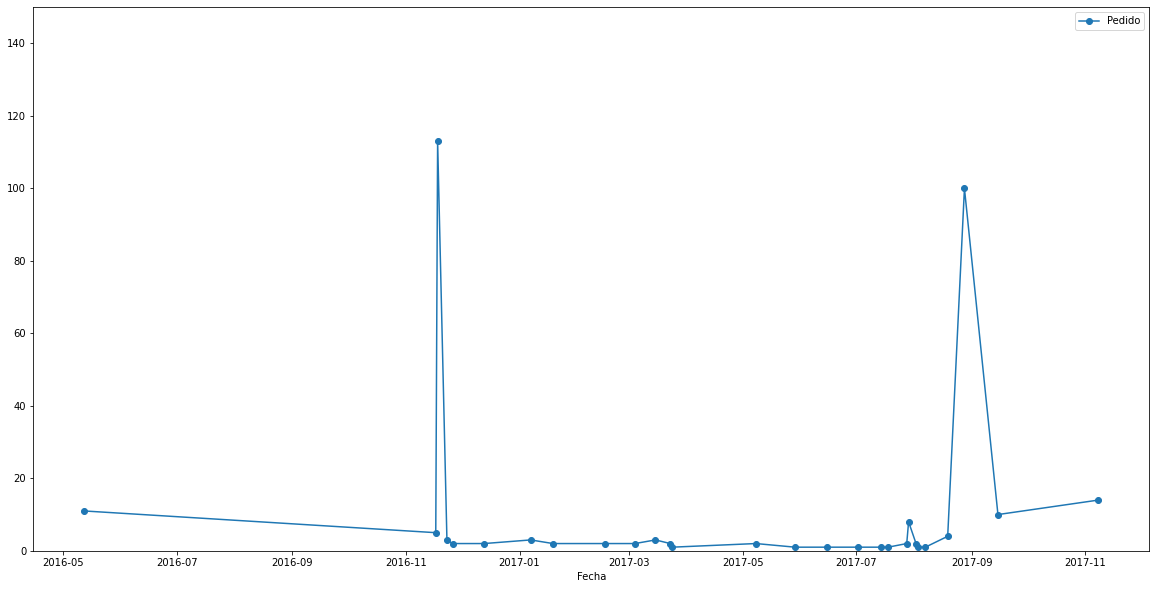

In [ ]:
productos1[productos1["Nombre_producto"]== "Aguacate Haas / Libra"].plot(ylim=(0,150), figsize=(20,10) , marker='o')

In [ ]:

productos1[productos1["Pedido"]==0]

,Nombre_producto,Pedido
Fecha,,


### Prueba **mse** para prophet con modelo independiente

In [ ]:
#Predicción para Piña
future = []
model = []
fcst_all = pd.DataFrame()
fcst =[]
productos_nm = ["Piña Golden Sweet / Unidad"]

for i in productos_nm:
  m = Prophet()
  dff3['y'] = dff_train[i]
  model = m.fit(dff3)
  future = model.make_future_dataframe(periods=8, freq='W')
  fcst = model.predict(future)
  
  
fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-8:]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
35,2017-08-06,2.822517,0.506180,5.173138
36,2017-08-13,2.864029,0.470515,5.476927
37,2017-08-20,2.905541,0.499937,5.127739
38,2017-08-27,2.947053,0.562098,5.711622
39,2017-09-03,2.988565,0.493607,5.408566
40,2017-09-10,3.030078,0.582443,5.336496
41,2017-09-17,3.071590,0.535540,5.599510
42,2017-09-24,3.113102,0.522596,5.524147


In [ ]:
testPiña = dff_test["Piña Golden Sweet / Unidad"][-8:] 
testPiña

Fecha
2017-08-07    4
2017-08-14    3
2017-08-21    2
2017-08-28    5
2017-09-04    4
2017-09-11    0
2017-09-18    1
2017-09-25    4
Name: Piña Golden Sweet / Unidad, dtype: int64

In [ ]:
predictPiña= fcst["yhat"][-8:]
predictPiña

35    2.822517
36    2.864029
37    2.905541
38    2.947053
39    2.988565
40    3.030078
41    3.071590
42    3.113102
Name: yhat, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(testPiña ,predictPiña )
print('Test MSE: %.3f' % error)

Test MSE: 2.715
